PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

Aluna: Andréia Araújo de Assis

Matrícula: 1134734

Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas.

In [ ]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sns
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [ ]:
#Instalação do Helium
!pip install helium

     |████████████████████████████████| 26.1 MB 1.9 MB/s 
     |████████████████████████████████| 904 kB 46.4 MB/s 
  Created wheel for helium: filename=helium-3.0.8-py3-none-any.whl size=26136469 sha256=76b343fd57bfa896bbde83e9c739d7bffc98633bd510f0591c001e94cd43d3d4
  Stored in directory: /root/.cache/pip/wheels/dd/b9/60/c045d4f0bd6fb635c989f017016a2c92086a2640434e992fb5
Successfully built helium


In [ ]:
#Instalação do Selenium
!pip install selenium

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Os arquivos dos datasets que serão usados para a manipulação das informações foram baixados do site da PRF de acordo com a lista abaixo e anexado na pasta do GoogleDrive já extraído em csv.

#Link para download dos arquivos da PRF de registros de ocorrrência


*   datatran2017.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/nqvFu7xEF6HhbAq/download
*   datatran2018.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download
*   datatran2019.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download
*   datatran2020.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download
*   datatran2021.zip: http://arquivos.prf.gov.br/arquivos/index.php/s/n1T3lymvIdDOzzb/download
*   datatran2022.zip: http://arquivos.prf.gov.br/arquivos/index.php/s/OEtK0ObcP55Siei/download

#Link para download dos arquivos da PRF de todos os registros de acidentes

*   acidentes2017.zip:https://arquivos.prf.gov.br/arquivos/index.php/s/PYMCvPsVa3ZHspf/download
*   acidentes2018.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/MJRqaDMQ27F60Ml/download
*   acidentes2019.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/vw74viLA7WuZI4H/download
*   acidentes2020.zip: https://arquivos.prf.gov.br/arquivos/index.php/s/35cUcYXWsrJd4tF/download
*   acidentes2021.zip: http://arquivos.prf.gov.br/arquivos/index.php/s/GYgqihbnTWG2OlK/download
*   acidentes2022.zip: http://arquivos.prf.gov.br/arquivos/index.php/s/V30MbCt8oJXspji/download










#Visualização dos datasets no Drive - PRF

In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência de 2017
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2017.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,2,0,2,0,0,0,2,1,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
3,12,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO
4,13,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,1,0,1,0,0,0,1,1,-26.4468,-49.2017,SR-SC,DEL8/6,UOP03/SC


In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência de 2018
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2018.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,5,0,0,4,1,0,4,1,-22.4694,-44.4470,SR-RJ,DEL5/7,UOP03/RJ
1,99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,0.4,FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,3,0,0,2,1,0,2,2,-27.5997,-48.5757,SR-SC,DEL8/1,UOP01/SC
2,99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1.0,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Curva,Não,5,0,1,0,3,1,1,3,-22.7639,-42.9275,SR-RJ,DEL5/4,UOP02/RJ
3,99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134.0,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,2,0,0,0,2,0,0,2,-27.9536,-52.9164,SR-RS,DEL9/14,UOP01/RS
4,99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,151.7,CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,1,0,0,1,0,0,1,1,-31.3952,-53.7839,SR-RS,DEL9/11,UOP03/RS


In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência de 2019
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2019.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.4605,-46.4877,SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,terça-feira,01:30:00,PR,373.0,177.3,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.0553,-50.2278,SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16.0,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.1216,-48.8826,SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,terça-feira,00:00:00,CE,20.0,429.5,FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.7700,-38.6701,SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327.0,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.7609,-43.0306,SR-MG,DEL4/3,UOP01/MG


In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência de 2020
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2020.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,678.1,GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,-11.7746,-49.1074,SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178.0,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,-22.7522,-43.4379,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,206.9,SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-27.5919,-48.6182,SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236.0,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,-11.4462,-61.4376,SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360.0,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,-25.6750,-50.7509,SR-PR,DEL7/3,UOP04/PR


In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência de 2021
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2021.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,314.9,LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Não,3,0,1,0,2,0,1,2,-28.43029392,-48.84925073,SR-SC,UOP01,DEL02
1,331694.0,2021-01-01,sexta-feira,00:15:00,PR,376.0,188.0,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,-23.46634923,-51.82808011,SR-PR,UOP01,DEL09
2,331696.0,2021-01-01,sexta-feira,00:00:00,SP,116.0,110.6,TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,-23.03412614,-45.5526999,SR-SP,UOP01,DEL06
3,331699.0,2021-01-01,sexta-feira,01:20:00,SC,101.0,111.0,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Curva,Sim,3,0,2,0,1,0,2,2,-26.83955734,-48.71418074,SR-SC,UOP04,DEL04
4,331701.0,2021-01-01,sexta-feira,00:30:00,PE,101.0,45.1,IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Múltipla,Desvio Temporário,Sim,2,0,0,1,1,0,1,2,-7.86521297,-34.90715176,SR-PE,UOP02,DEL01


In [ ]:
#Visualização dos Arquivos no Drive: PRF de registros de ocorrência do ano de 2022 até o mês de fevereiro
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2022.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405147,2022-01-01,sábado,00:10:00,CE,222.0,2.8,FORTALEZA,Ingestão de álcool pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Interseção de vias,Sim,2,0,0,1,1,0,1,2,-3.73911117,-38.58687498,SR-CE,UOP01,DEL01
1,405149,2022-01-01,sábado,01:30:00,PE,104.0,63.0,CARUARU,Condutor desrespeitou a iluminação vermelha do...,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Interseção de vias,Sim,4,0,1,1,1,1,2,2,-8.2698,-35.9803,SR-PE,UOP01,DEL02
2,405151,2022-01-01,sábado,01:35:00,PI,316.0,415.0,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-7.43280012,-40.68261908,SR-PI,UOP03,DEL04
3,405152,2022-01-01,sábado,00:20:00,MG,381.0,159.2,GOVERNADOR VALADARES,Condutor Dormindo,Tombamento,Com Vítimas Fatais,Plena Noite,Crescente,Nublado,Simples,Curva,Não,2,1,0,1,0,0,1,2,-18.92455594,-42.01932801,SR-MG,UOP01,DEL06
4,405153,2022-01-01,sábado,02:20:00,PR,277.0,664.0,MEDIANEIRA,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Não Informado,Não,1,0,0,1,0,0,1,1,-25.25301037,-54.02857196,SR-PR,UOP02,DEL05


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes de 2017
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2017.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,5.0,Motocicleta,HONDA/CG 150 TITAN ESD,2005.0,Condutor,Lesões Graves,19.0,Masculino,0,0,1,0,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,7.0,Automóvel,FIAT/PALIO WEEKEND EX,2003.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11,3.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Passageiro,Lesões Leves,27.0,Masculino,0,1,0,0,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
3,11,2.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Condutor,Lesões Leves,27.0,Feminino,0,1,0,0,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
4,12,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,8.0,Motocicleta,KASINSKI/COMET 250,2011.0,Condutor,Lesões Graves,24.0,Masculino,0,0,1,0,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes de 2018
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2018.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Condutor,Lesões Graves,58.0,Masculino,0,0,1,0,-22.4694,-44.447,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,59.0,Feminino,0,0,1,0,-22.4694,-44.447,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Ileso,9.0,Masculino,1,0,0,0,-22.4694,-44.447,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,9.0,Feminino,0,0,1,0,-22.4694,-44.447,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,15.0,Masculino,0,0,1,0,-22.4694,-44.447,SR-RJ,DEL5/7,UOP03/RJ


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes de 2019
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2019.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,136.9,RUSSAS,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Amanhecer,Decrescente,Vento,Simples,Curva,Não,324937,Caminhão,I/MB 15SPRINT RONTAN AMB,2012.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-4.7660,-38.0560,SR-CE,DEL16/3,UOP01/CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,599.5,AGUA BOA,Defeito Mecânico no Veículo,Incêndio,Sem Vítimas,Amanhecer,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,324940,Caminhão,FORD/CARGO 815 N,2011.0,Condutor,Ileso,30.0,Masculino,1,0,0,0,-14.3190,-52.1690,SR-MT,DEL2/8,UOP02/MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34.0,DOM ELISEU,Velocidade Incompatível,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Nublado,Simples,Não Informado,Não,324958,Caminhão-trator,VOLVO/FH 540 6X4T,2012.0,Condutor,Ileso,54.0,Masculino,1,0,0,0,-4.1530,-47.5461,SR-PA,DEL19/2,UOP03/PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13.0,RIO REAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Desvio Temporário,Não,324987,Caminhão-trator,SCANIA/R 440 A6X2,2018.0,Condutor,Ileso,43.0,Masculino,1,0,0,0,-11.5896,-37.8761,SR-SE,DEL20/2,UOP03/SE
4,182307.0,402642.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440.0,FEIRA DE SANTANA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Curva,Não,325030,Caminhão-trator,VOLVO/FH12 380 4X2T,2003.0,Passageiro,Lesões Graves,37.0,Masculino,0,0,1,0,-12.3440,-39.0870,SR-BA,DEL10/2,UOP01/BA


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes de 2020
#essa planilha deu erro ao ser processada pois possuia campos sem informações retornava <undefined>, causando o erro de leitura. Para isso o encoiding precisou ser utf8
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2020.csv', sep=';', decimal=',', encoding = 'utf8')
df.head()


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260068.0,578549.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,464176,Caminhão-trator,IVECO/ECCURSOR 450E32TN,2008.0,Condutor,Lesões Leves,38.0,Masculino,0,1,0,0,-1.3102,-47.7446,SR-PA,DEL19/1,UOP02/PA
1,260068.0,578550.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,464176,Caminhão-trator,IVECO/ECCURSOR 450E32TN,2008.0,Passageiro,Lesões Leves,14.0,Masculino,0,1,0,0,-1.3102,-47.7446,SR-PA,DEL19/1,UOP02/PA
2,260073.0,580299.0,2020-01-01,quarta,06:00:00,MG,262.0,804.0,UBERABA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,465364,Caminhão-trator,NaN,NaN,Condutor,Ileso,NaN,Masculino,1,0,0,0,-19.7675,-47.9873,SR-MG,DEL13,UOP01/MG
3,260087.0,578794.0,2020-01-01,quarta,06:00:00,BA,116.0,191.0,CANUDOS,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,464347,Caminhão-trator,SCANIA/R 440 A6X4,2015.0,Condutor,Óbito,64.0,Masculino,0,0,0,1,-10.3200,-39.0643,SR-BA,DEL10/7,UOP02/BA
4,260116.0,578657.0,2020-01-01,quarta,10:08:00,SP,116.0,71.0,APARECIDA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Dupla,Reta,Sim,464201,Caminhão,VW/24.280 CRM 6X2,2015.0,Condutor,Ileso,57.0,Masculino,1,0,0,0,-22.8565,-45.2311,SR-SP,DEL6/8,UOP02/SP


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes de 2021
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2021.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331730.0,738258.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Curva,Não,595150,Caminhão,VOLVO/VM 260 6X2R,2010.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-24.56168114,-47.86752174,SR-SP,UOP01,DEL05
1,331804.0,738412.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,595262,Caminhão-trator,SCANIA/R112 H,1982.0,Condutor,Ileso,65.0,Masculino,1,0,0,0,-2.508068,-60.036434,SR-AM,UOP01,DEL01
2,331815.0,738692.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,595291,Caminhão-trator,SCANIA/R124 GA4X2NZ 360,1999.0,Passageiro,Lesões Leves,NaN,Feminino,0,1,0,0,-3.707626,-39.623509,SR-CE,UOP03,DEL04
3,331815.0,738689.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,595291,Caminhão-trator,SCANIA/R124 GA4X2NZ 360,1999.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-3.707626,-39.623509,SR-CE,UOP03,DEL04
4,331823.0,740272.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Curva,Sim,595234,Caminhão-trator,VOLVO/FH 460 6X2T,2017.0,Condutor,Ileso,51.0,Masculino,1,0,0,0,-22.6687122,-43.01862696,SR-RJ,UOP04,DEL02


In [ ]:
#Visualização dos Arquivos no Drive: PRF de todos os registros de acidentes do ano de 2022 até o mês de fevereiro
df = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2022.csv', sep=';', decimal=',', encoding = 'cp1252')
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,405151,910368.0,2022-01-01,sábado,01:35:00,PI,316.0,415.0,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,734138,Caminhão-trator,M.BENZ/LS 1634,2008.0,Condutor,Ileso,33.0,Masculino,1,0,0,0,-7.43280012,-40.68261908,SR-PI,UOP03,DEL04
1,405152,906619.0,2022-01-01,sábado,00:20:00,MG,381.0,159.2,GOVERNADOR VALADARES,Condutor Dormindo,Tombamento,Com Vítimas Fatais,Plena Noite,Crescente,Nublado,Simples,Curva,Não,734187,Caminhão-trator,VOLVO/FH 440 6X2T,2009.0,Condutor,Lesões Graves,59.0,Masculino,0,0,1,0,-18.92455594,-42.01932801,SR-MG,UOP01,DEL06
2,405152,906394.0,2022-01-01,sábado,00:20:00,MG,381.0,159.2,GOVERNADOR VALADARES,Condutor Dormindo,Tombamento,Com Vítimas Fatais,Plena Noite,Crescente,Nublado,Simples,Curva,Não,734186,Caminhão-trator,SCANIA/R450 A6X2,2020.0,Condutor,Óbito,33.0,Masculino,0,0,0,1,-18.92455594,-42.01932801,SR-MG,UOP01,DEL06
3,405158,906468.0,2022-01-01,sábado,02:40:00,PR,116.0,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,734209,Caminhão-trator,SCANIA/R 480 A6X4,2014.0,Passageiro,Óbito,50.0,Feminino,0,0,0,1,-25.114403,-48.8467554,SR-PR,UOP02,DEL01
4,405158,912108.0,2022-01-01,sábado,02:40:00,PR,116.0,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,734209,Caminhão-trator,SCANIA/R 480 A6X4,2014.0,Condutor,Lesões Leves,47.0,Masculino,0,1,0,0,-25.114403,-48.8467554,SR-PR,UOP02,DEL01



Os arquivos dos datasets abaixo serão usados para a manipulação das informações e foram baixados do site do DINIT e anexados na pasta do GoogleDrive. Eles estão em xls. A aba "resumo do snv" e "Tabela do SNV" foi tratada por conter campos mesclado e imagem, após, gerado tabela em formato csv.

#Link para download dos arquivos de SNV do DNIT

http://servicos.dnit.gov.br/dnitcloud/index.php/s/oTpPRmYs5AAdiNr?path=%2FSNV%20Planilhas%20(2011-Atual)%20(XLS)

* Os dados de rodovias de 2017 é da planilha "SNV_201801B.xls"
* Os dados de rodovias de 2018 é da planilha "SNV_201903A.xls"
* Os dados de rodovias de 2019 é da planilha "SNV_202001A.xls"
* Os dados de rodovias de 2020 é da planilha "SNV_202101A.xls"
* Os dados de rodovias de 2021 é da planilha "SNV_202201B.xls"

#Visualização dos datasets no Drive - Tabela SNV DNIT

In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Tabela do SNV do DNIT 2017
#SNV_201801B
tab_snv_2017 = pd.read_csv('/content/drive/My Drive/PUC_TCC/TABELA_SNV_201801B.csv', sep=';', decimal=',', encoding = 'cp1252')
tab_snv_2017.head()

,BR,UF,km inicial,km final,Extensao
0,10,DF,0.0,2.5,2.5
1,10,DF,2.5,6.0,3.5
2,10,DF,6.0,8.4,2.4
3,10,DF,8.4,18.8,10.4
4,10,DF,18.8,22.6,3.8


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Tabela do SNV do DNIT 2018
#SNV_201903A
tab_snv_2018 = pd.read_csv('/content/drive/My Drive/PUC_TCC/TABELA_SNV_201903A.csv', sep=';', decimal=',', encoding = 'cp1252')
tab_snv_2018.head()

,BR,UF,km inicial,km final,Extensao
0,10,DF,0.0,2.5,2.5
1,10,DF,2.5,6.0,3.5
2,10,DF,6.0,8.4,2.4
3,10,DF,8.4,18.8,10.4
4,10,DF,18.8,22.6,3.8


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Tabela do SNV do DNIT 2019
#SNV_202001A
tab_snv_2019 = pd.read_csv('/content/drive/My Drive/PUC_TCC/TABELA_SNV_202001A.csv', sep=';', decimal=',', encoding = 'cp1252')
tab_snv_2019.head()

,BR,UF,km inicial,km final,Extensao
0,10,DF,0.0,2.4,2.4
1,10,DF,2.4,6.0,3.6
2,10,DF,6.0,8.3,2.3
3,10,DF,8.3,18.2,9.9
4,10,DF,18.2,22.0,3.8


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Tabela do SNV do DNIT 2020
#SNV_202101Aa
tab_snv_2020 = pd.read_csv('/content/drive/My Drive/PUC_TCC/TABELA_SNV_202101Aa.csv', sep=';', decimal=',', encoding = 'cp1252')
tab_snv_2020.head()

,BR,UF,km inicial,km final,Extensao
0,10,DF,0.0,2.4,2.4
1,10,DF,2.4,6.0,3.6
2,10,DF,6.0,8.3,2.3
3,10,DF,8.3,18.2,9.9
4,10,DF,18.2,22.0,3.8


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Tabela do SNV do DNIT 2021
#SNV_202201B
tab_snv_2021 = pd.read_csv('/content/drive/My Drive/PUC_TCC/TABELA_SNV_202201B.csv', sep=';', decimal=',', encoding = 'cp1252')
tab_snv_2021.head()

,BR,UF,km inicial,km final,Extensao
0,10,DF,0.0,2.4,2.4
1,10,DF,2.4,6.0,3.6
2,10,DF,6.0,8.3,2.3
3,10,DF,8.3,18.2,9.9
4,10,DF,18.2,22.0,3.8


#Visualização dos datasets no Drive - Resumo SNV DNIT



In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Resumo do SNV do DNIT 2017
#SNV_201801B
acidentes_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes_mg.csv', sep=';', decimal=',', encoding = 'cp1252', low_memory = False, parse_dates = ['data_inversa'])
snv_2017.head()

,REGIAO,UF,Estado,PLANEJADA,TRAVESSIA_N_Pav,LEITO NATUAL_N_Pav,EM OBRAS IMP_N_Pav,IMPLANT_N_Pav,EM OBRAS PAV_N_Pav,SUB-TOTAL_N_Pav,PISTA SIMPLES_Pav,EM OBRAS DUP_Pav,PISTA DUPLA_Pav,SUB-TOTAL_Pav,TOTAL,Total_Sem_Planejamento
0,Centro-Oeste,DF,Distrito Federal,"170,2",-,-,-,-,-,NaN,"78,3",-,129,"207,3","377,5",207.3
1,Centro-Oeste,GO,Goias,"2.627,10",-,"100,7",-,-,"178,7","279,4","2.605,80","44,8","765,8","3.416,40","6.322,90",3695.8
2,Centro-Oeste,MS,Mato Grosso do Sul,"562,6",-,"225,5",-,"1,4","36,2","263,1","3.710,20",-,68,"3.778,20","4.603,90",4041.3
3,Centro-Oeste,MT,Mato Grosso,"1.541,20",-,"427,7",-,402,"235,8","1.065,50","3.656,70","206,8","155,1","4.018,60","6.625,30",5084.1
4,Nordeste,AL,Alagoas,"100,5",-,49,-,-,"4,4","53,4","473,6","182,7","91,5","747,8","901,7",801.2


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Resumo do SNV do DNIT 2018
#SNV_201903A
snv_2018 = pd.read_csv('/content/drive/My Drive/PUC_TCC/Resumo_SNV_201903A.csv', sep=';', decimal=',', encoding = 'cp1252')
snv_2018.head()

,REGIAO,UF,Estado,PLANEJADA,TRAVESSIA_N_Pav,LEITO NATUAL_N_Pav,EM OBRAS IMP_N_Pav,IMPLANT_N_Pav,EM OBRAS PAV_N_Pav,SUB-TOTAL_N_Pav,PISTA SIMPLES_Pav,EM OBRAS DUP_Pav,PISTA DUPLA_Pav,SUB-TOTAL_Pav,TOTAL,Total_Sem_Planejamento
0,Centro-Oeste,DF,Distrito Federal,"170,2",-,-,-,-,-,NaN,"82,5",-,"120,8","203,3","373,5","203,3"
1,Centro-Oeste,GO,Goias,"2.662,40",-,"100,7",-,-,"178,7","279,4","2.597,30","18,7","791,9","3.407,90","6.349,70","3687,3"
2,Centro-Oeste,MS,Mato Grosso do Sul,"515,2",-,"225,5",-,-,"21,8","247,3","3.753,80",-,"79,5","3.833,30","4.595,80","4080,6"
3,Centro-Oeste,MT,Mato Grosso,"1.524,00",-,"431,7",-,402,246,"1.079,70","3.538,20","206,8","273,6","4.018,60","6.622,30","5098,3"
4,Nordeste,AL,Alagoas,"100,5",-,49,-,-,"4,4","53,4","473,6","182,7","91,5","747,8","901,7","801,2"


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Resumo do SNV do DNIT 2019
#SNV_202001A
snv_2019 = pd.read_csv('/content/drive/My Drive/PUC_TCC/Resumo_SNV_202001A.csv', sep=';', decimal=',', encoding = 'cp1252')
snv_2019.head()

,REGIAO,UF,Estado,PLANEJADA,TRAVESSIA_N_Pav,LEITO NATUAL_N_Pav,EM OBRAS IMP_N_Pav,IMPLANT_N_Pav,EM OBRAS PAV_N_Pav,SUB-TOTAL_N_Pav,PISTA SIMPLES_Pav,EM OBRAS DUP_Pav,PISTA DUPLA_Pav,SUB-TOTAL_Pav,TOTAL,Total_Sem_Planejamento
0,Centro-Oeste,DF,Distrito Federal,"170,2",-,-,-,-,-,NaN,"82,5",-,"121,7","204,2","374,4",204.2
1,Centro-Oeste,GO,Goias,"2.662,40",-,"100,7",-,-,"178,7","279,4","2.597,30","18,7","791,9","3.407,90","6.349,70",3687.3
2,Centro-Oeste,MS,Mato Grosso do Sul,"528,3",-,"225,5",-,-,"21,8","247,3","3.753,80",-,"79,5","3.833,30","4.608,90",4080.6
3,Centro-Oeste,MT,Mato Grosso,"1.524,00",-,"431,7",-,402,246,"1.079,70","3.538,20","206,8","273,6","4.018,60","6.622,30",5098.3
4,Nordeste,AL,Alagoas,94,-,-,-,-,"4,4","4,4","527,2","95,8","178,9","801,9","900,3",806.3


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Resumo do SNV do DNIT 2020
#SNV_202101Aa
snv_2020 = pd.read_csv('/content/drive/My Drive/PUC_TCC/Resumo_SNV_202101Aa.csv', sep=';', decimal=',', encoding = 'cp1252')
snv_2020.head()

,REGIAO,UF,Estado,PLANEJADA,TRAVESSIA,LEITO NATUAL_N_Pav,EM OBRAS IMP_N_Pav,IMPLANT_N_Pav,EM OBRAS PAV_N_Pav,PISTA SIMPLES_Pav,EM OBRAS DUP_Pav,PISTA DUPLA_Pav,TOTAL,Total_Sem_Planejamento
0,Centro-Oeste,DF,Distrito Federal,"170,2",-,NaN,NaN,NaN,NaN,"82,5",NaN,"121,7","374,4",204.2
1,Centro-Oeste,GO,Goias,"3.185,90",-,100.7,NaN,NaN,178.7,"2.070,30",18.7,"791,9","6.346,20",3160.3
2,Centro-Oeste,MS,Mato Grosso do Sul,"571,9",-,225.5,NaN,NaN,21.8,"3.736,70",NaN,"79,5","4.635,40",4063.5
3,Centro-Oeste,MT,Mato Grosso,"1.524,00",-,431.7,NaN,402,40.3,"3.743,90",194.1,"286,3","6.622,30",5098.3
4,Nordeste,AL,Alagoas,71,-,NaN,NaN,NaN,4.4,"549,9",95.8,"178,9",900,829.0


In [ ]:
#Visualização dos Arquivos no Drive: Leitura do arquivo Resumo do SNV do DNIT 2021
#SNV_202201B
snv_2021 = pd.read_csv('/content/drive/My Drive/PUC_TCC/Resumo_SNV_202201B.csv', sep=';', decimal=',', encoding = 'cp1252')
snv_2021.head()

,REGIAO,UF,Estado,PLANEJADA,TRAVESSIA,LEITO NATUAL_N_Pav,EM OBRAS IMP_N_Pav,IMPLANT_N_Pav,EM OBRAS PAV_N_Pav,PISTA SIMPLES_Pav,EM OBRAS DUP_Pav,PISTA DUPLA_Pav,TOTAL,Total_Sem_Planejamento
0,Centro-Oeste,DF,Distrito Federal,155,NaN,NaN,NaN,NaN,NaN,"97,7",NaN,"121,7","374,4",219.4
1,Centro-Oeste,GO,Goias,"2.659,30",-,100.7,NaN,NaN,178.7,"2.597,30",18.7,"791,9","6.346,60",3687.3
2,Centro-Oeste,MS,Mato Grosso do Sul,"571,9",-,225.5,NaN,NaN,21.8,"3.736,70",NaN,"79,5","4.635,40",4063.5
3,Centro-Oeste,MT,Mato Grosso,"1.468,80",-,461.7,NaN,"408,5",40.3,"3.766,00",194.1,"286,3","6.625,70",5156.9
4,Nordeste,AL,Alagoas,"80,4",-,NaN,NaN,NaN,4.4,"549,9",95.8,"178,9","909,4",829.0


#Análise dos dados de cada dataset do DNIT

A seguir, verificação da Extensão total em KM por UF (sem as planejadas) dos anos de 2017, 2018, 2019, 2020 e 2021

> Como observaremos, Minas Gerais é o estado que possui maior extensão de rodovias federais em KM em todos os anos.

In [ ]:
print("Extensões de rodovias por UF em 2017")
snv_2017 = snv_2017.sort_values(by ='Total_Sem_Planejamento', ascending=False)
print(snv_2017[['UF', 'Total_Sem_Planejamento']])

Extensões de rodovias por UF em 2017
      UF  Total_Sem_Planejamento
21   MG                   9577.0
5    BA                   7061.0
25   RS                   5799.4
16   PA                   5122.0
3    MT                   5084.1
24   PR                   4053.4
2    MS                   4041.3
1    GO                   3695.8
7    MA                   3263.9
10   PI                   2876.2
6    CE                   2550.6
14   AM                   2366.6
26   SC                   2352.1
9    PE                   2248.3
17   RO                   2118.9
19   TO                   2117.2
22   RJ                   1708.4
18   RR                   1673.9
11   RN                   1549.3
8    PB                   1301.3
13   AC                   1149.5
23   SP                   1122.3
20   ES                   1077.4
15   AP                   1021.4
4    AL                    801.2
12   SE                    318.8
0    DF                    207.3


In [ ]:
print("Extensões de rodovias por UF em 2018")
snv_2018 = snv_2018.sort_values(by ='Total_Sem_Planejamento', ascending=False)
print(snv_2018[['UF', 'Total_Sem_Planejamento']])

Extensões de rodovias por UF em 2018
      UF Total_Sem_Planejamento
21   MG                  8859,9
4    AL                   801,2
5    BA                    7294
25   RS                  5801,5
16   PA                  5122,5
3    MT                  5098,3
2    MS                  4080,6
24   PR                  3914,1
1    GO                  3687,3
7    MA                  3270,9
12   SE                   318,8
10   PI                  2876,2
6    CE                  2557,8
14   AM                  2367,6
9    PE                  2248,5
17   RO                  2118,9
19   TO                  2117,5
0    DF                   203,3
26   SC                2.375,60
22   RJ                  1707,3
18   RR                  1671,8
11   RN                  1548,5
8    PB                  1302,3
13   AC                  1177,8
23   SP                  1122,4
20   ES                  1083,9
15   AP                  1021,4


In [ ]:
print("Extensões de rodovias por UF em 2019")
snv_2019 = snv_2019.sort_values(by ='Total_Sem_Planejamento', ascending=False)
print(snv_2019[['UF', 'Total_Sem_Planejamento']])

Extensões de rodovias por UF em 2019
      UF  Total_Sem_Planejamento
21   MG                   8819.4
5    BA                   7315.9
25   RS                   5801.5
16   PA                   5122.5
3    MT                   5098.3
2    MS                   4080.6
24   PR                   3913.9
1    GO                   3687.3
7    MA                   3270.9
10   PI                   2876.2
6    CE                   2557.8
14   AM                   2400.4
26   SC                   2375.6
9    PE                   2248.5
19   TO                   2117.5
17   RO                   1942.5
22   RJ                   1707.3
18   RR                   1672.0
11   RN                   1548.1
8    PB                   1303.3
13   AC                   1177.8
23   SP                   1122.4
20   ES                   1042.7
15   AP                   1021.4
4    AL                    806.3
12   SE                    318.8
0    DF                    204.2


In [ ]:
print("Extensões de rodovias por UF em 2020")
snv_2020 = snv_2020.sort_values(by ='Total_Sem_Planejamento', ascending=False)
print(snv_2020[['UF', 'Total_Sem_Planejamento']])

Extensões de rodovias por UF em 2020
      UF  Total_Sem_Planejamento
21   MG                   8859.7
5    BA                   7553.6
25   RS                   5794.5
3    MT                   5098.3
16   PA                   5056.8
2    MS                   4063.5
24   PR                   3949.7
1    GO                   3160.3
10   PI                   2574.6
7    MA                   2558.0
6    CE                   2409.2
26   SC                   2382.6
9    PE                   2273.7
14   AM                   2218.1
19   TO                   1887.8
17   RO                   1872.2
22   RJ                   1713.0
11   RN                   1548.2
18   RR                   1491.7
8    PB                   1302.4
13   AC                   1177.6
23   SP                   1122.4
20   ES                   1042.8
15   AP                   1021.2
4    AL                    829.0
12   SE                    318.8
0    DF                    204.2


In [ ]:
print("Extensões de rodovias por UF em 2021")
snv_2021 = snv_2021.sort_values(by ='Total_Sem_Planejamento', ascending=False)
print(snv_2021[['UF', 'Total_Sem_Planejamento']])

Extensões de rodovias por UF em 2021
      UF  Total_Sem_Planejamento
21   MG                   8791.7
5    BA                   7482.0
25   RS                   5800.2
3    MT                   5156.9
16   PA                   5068.4
2    MS                   4063.5
24   PR                   3941.8
1    GO                   3687.3
7    MA                   3270.7
10   PI                   2574.6
6    CE                   2396.0
26   SC                   2382.6
9    PE                   2273.7
14   AM                   2139.1
19   TO                   2124.3
17   RO                   1952.2
22   RJ                   1715.1
18   RR                   1567.5
11   RN                   1548.2
8    PB                   1302.4
13   AC                   1177.6
23   SP                   1122.4
20   ES                   1045.2
15   AP                   1021.2
4    AL                    829.0
12   SE                    318.8
0    DF                    219.4


#Junção dos datasets da PRF

In [ ]:
#Junção dos arquivos datatran.CSV
a = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2017.csv', sep=';', decimal=',', encoding = 'cp1252') 
b = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2018.csv', sep=';', decimal=',', encoding = 'cp1252')
c = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2019.csv', sep=';', decimal=',', encoding = 'cp1252')
d = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2020.csv', sep=';', decimal=',', encoding = 'cp1252')
e = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2021.csv', sep=';', decimal=',', encoding = 'cp1252')
f = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2022.csv', sep=';', decimal=',', encoding = 'cp1252')
juncao = pd.concat([a,b,c,d,e,f], join="inner")
juncao.to_csv('/content/drive/My Drive/PUC_TCC/datatran.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Junção dos arquivos acidentes.CSV
g = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2017.csv', sep=';', decimal=',', encoding = 'cp1252')
h = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2018.csv', sep=';', decimal=',', encoding = 'cp1252')
i = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2019.csv', sep=';', decimal=',', encoding = 'cp1252')
j = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2020.csv', sep=';', decimal=',', encoding = 'utf8')
k = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2021.csv', sep=';', decimal=',', encoding = 'cp1252')
l = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2022.csv', sep=';', decimal=',', encoding = 'cp1252')
juncaoAcidentes = pd.concat([g,h, i, j, k, l], join="inner")
juncaoAcidentes.to_csv('/content/drive/My Drive/PUC_TCC/acidentes.csv', index=False, sep=';', decimal=',', encoding = 'cp1252')

#Análise dos dados de cada dataset da PRF

In [ ]:
#Verifica a importação e visualização das dimenções do datatran.CSV
datatran = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran.csv', sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Verifica a quantidade de linhas e colunas do datatran.CSV
datatran.shape

(364134, 30)

In [ ]:
#Verifica a descrição do index do datatran.CSV 
datatran.index

RangeIndex(start=0, stop=364134, step=1)

In [ ]:
#Verifica o nome das colunas do datatran.CSV
datatran.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], dtype='object')

In [ ]:
#Verifica tipos e formatos dos dados do datatran.CSV
datatran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364134 entries, 0 to 364133
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      364134 non-null  float64
 1   data_inversa            364134 non-null  object 
 2   dia_semana              364134 non-null  object 
 3   horario                 364134 non-null  object 
 4   uf                      364134 non-null  object 
 5   br                      363428 non-null  float64
 6   km                      363428 non-null  float64
 7   municipio               364134 non-null  object 
 8   causa_acidente          364134 non-null  object 
 9   tipo_acidente           364134 non-null  object 
 10  classificacao_acidente  364134 non-null  object 
 11  fase_dia                364134 non-null  object 
 12  sentido_via             364134 non-null  object 
 13  condicao_metereologica  364134 non-null  object 
 14  tipo_pista          

In [ ]:
#Realiza a contagem de dados não nulos do datatran.CSV
datatran.count()

id                        364134
data_inversa              364134
dia_semana                364134
horario                   364134
uf                        364134
br                        363428
km                        363428
municipio                 364134
causa_acidente            364134
tipo_acidente             364134
classificacao_acidente    364134
fase_dia                  364134
sentido_via               364134
condicao_metereologica    364134
tipo_pista                364134
tracado_via               364134
uso_solo                  364134
pessoas                   364134
mortos                    364134
feridos_leves             364134
feridos_graves            364134
ilesos                    364134
ignorados                 364134
feridos                   364134
veiculos                  364134
latitude                  364134
longitude                 364134
regional                  364134
delegacia                 364134
uop                       353043
dtype: int

In [ ]:
#Realiza a contagem dos valores únicos do datatran.CSV
datatran.nunique()

id                        364134
data_inversa                1885
dia_semana                     7
horario                     1438
uf                            27
br                           128
km                          9666
municipio                   2046
causa_acidente                86
tipo_acidente                 20
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
pessoas                       67
mortos                        16
feridos_leves                 45
feridos_graves                25
ilesos                        59
ignorados                     17
feridos                       49
veiculos                      17
latitude                  212063
longitude                 213225
regional                      28
delegacia                    225
uop                          145
dtype: int

In [ ]:
#Realiza a contagem dos valores nulos e NaN nas colunas do datatran.CSV
datatran.isnull().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          706
km                          706
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                      0
longitude                     0
regional                      0
delegacia                     0
uop                       11091
dtype: int64

In [ ]:
#Exibe as primeiras 50 linhas do datatran.CSV
datatran.head(50)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,-23.09880731,-52.38789369,SR-PR,DEL7/7,UOP05/PR
1,9.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,2,0,2,0,0,0,2,1,-23.36951985,309.93513107,SR-PR,DEL7/7,UOP07/PR
3,12.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,-16.27473677,-48.96908998,SR-GO,DEL1/2,UOP01/GO
4,13.0,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,1,0,1,0,0,0,1,1,-26.44675249,-49.20166969,SR-SC,DEL8/6,UOP03/SC
5,14.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,2,0,1,0,1,0,1,2,-16.82489647,-49.53520775,SR-GO,DEL1/1,UOP02/GO
6,15.0,2017-01-01,domingo,00:01:00,PB,104.0,3.4,NOVA FLORESTA,Ingestão de Álcool,Tombamento,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Sim,1,1,0,0,0,0,0,1,-6.4622,-36.1899,SR-PB,DEL14/2,UOP04/PB
7,16.0,2017-01-01,domingo,00:30:00,TO,153.0,141.7,ARAGUAINA,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Ignorado,Múltipla,Reta,Sim,4,0,2,0,1,1,2,2,-7.18668515,-48.22970957,SR-TO,UOP04/TO,NaN
8,17.0,2017-01-01,domingo,01:45:00,RS,116.0,34.9,VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,6,0,4,0,2,0,4,2,-28.5071196,-50.941176,SR-RS,DEL9/5,UOP03/RS
9,18.0,2017-01-01,domingo,01:40:00,RS,290.0,722.0,URUGUAIANA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,2,0,2,0,0,0,2,1,-29.75605083,-57.06461906,SR-RS,DEL9/13,UOP01/RS


In [ ]:
#Exibe as últimas 50 linhas do datatran.CSV
datatran.tail(50)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
364084,420784.0,2022-02-23,quarta-feira,20:00:00,SP,116.0,270.0,TABOAO DA SERRA,Ausência de reação do condutor,Colisão traseira,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Múltipla,Reta,Sim,2,0,0,0,1,1,0,2,-23.61799728,-46.79677694,SR-SP,UOP01,DEL04
364085,420787.0,2022-02-05,sábado,17:14:00,ES,101.0,99.0,JAGUARE,Ausência de reação do condutor,Queda de ocupante de veículo,Com Vítimas Feridas,Anoitecer,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,-18.97188909,-39.99152282,SR-ES,UOP02,DEL04
364086,420801.0,2022-02-05,sábado,05:40:00,RR,174.0,6.0,BOA VISTA,Pista esburacada,Queda de ocupante de veículo,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Simples,Reta,Não,1,0,0,1,0,0,1,1,2.78913276,-60.78297615,SR-RR,UOP01,DEL01
364087,420812.0,2022-02-04,sexta-feira,17:30:00,RS,290.0,73.9,GRAVATAI,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,10,2,2,2,4,0,4,6,-29.952868,-50.986462,SR-RS,UOP01,DEL03
364088,420815.0,2022-02-17,quinta-feira,18:10:00,GO,40.0,7.0,VALPARAISO DE GOIAS,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Anoitecer,Crescente,Nublado,Dupla,Reta,Sim,2,0,0,1,1,0,1,2,-16.108482,-47.972524,SR-DF,UOP01,DEL01
364089,420824.0,2022-02-13,domingo,20:45:00,RJ,101.0,303.0,SAO GONCALO,Transitar na contramão,Colisão frontal,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,0,1,0,1,0,1,2,-22.7828205,-42.9766681,SR-RJ,UOP02,DEL02
364090,420877.0,2022-02-19,sábado,16:35:00,BA,324.0,295.0,JACOBINA,Acessar a via sem observar a presença dos outr...,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,2,0,1,1,0,0,2,2,-11.19322111,-40.50109863,SR-BA,UOP02,DEL04
364091,420884.0,2022-02-20,domingo,18:10:00,RN,304.0,84.8,ACU,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,2,0,0,0,2,0,0,2,-5.49932609,-37.14569806,SR-RN,UOP01,DEL04
364092,420908.0,2022-02-13,domingo,00:30:00,PR,277.0,79.0,CURITIBA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Não Informado,Sim,3,0,1,0,2,0,1,2,-25.47728044,-49.20518875,SR-PR,UOP01,DEL01
364093,420909.0,2022-02-24,quinta-feira,23:30:00,PR,476.0,128.0,CURITIBA,Ingestão de álcool pelo condutor,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Interseção de vias,Sim,2,0,1,0,1,0,1,2,-25.433048,-49.23156,SR-PR,UOP03,DEL01


In [ ]:
#Importação e visualização das dimensões do arquivo acidentes.CSV
acidentes = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes.csv', sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Analisa a quantidade de linhas e colunas do acidentes.CSV 
acidentes.shape

(853482, 35)

In [ ]:
#Analisa a descrição do index do acidentes.CSV
acidentes.index

RangeIndex(start=0, stop=853482, step=1)

In [ ]:
#Exibe as colunas presentes no acidentes.CSV
acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], dtype='object')

In [ ]:
#Verificação o tipos e formatos dos dados do acidentes.CSV
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853482 entries, 0 to 853481
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      853482 non-null  float64
 1   pesid                   853476 non-null  float64
 2   data_inversa            853482 non-null  object 
 3   dia_semana              853482 non-null  object 
 4   horario                 853482 non-null  object 
 5   uf                      853482 non-null  object 
 6   br                      851799 non-null  float64
 7   km                      851799 non-null  float64
 8   municipio               853482 non-null  object 
 9   causa_acidente          853482 non-null  object 
 10  tipo_acidente           853482 non-null  object 
 11  classificacao_acidente  853482 non-null  object 
 12  fase_dia                853482 non-null  object 
 13  sentido_via             853482 non-null  object 
 14  condicao_metereologi

In [ ]:
#Realiza a contagem de dados não-nulos do acidentes.CSV
acidentes.count()

id                        853482
pesid                     853476
data_inversa              853482
dia_semana                853482
horario                   853482
uf                        853482
br                        851799
km                        851799
municipio                 853482
causa_acidente            853482
tipo_acidente             853482
classificacao_acidente    853482
fase_dia                  853482
sentido_via               853482
condicao_metereologica    853482
tipo_pista                853482
tracado_via               853482
uso_solo                  853482
id_veiculo                853478
tipo_veiculo              853482
marca                     810302
ano_fabricacao_veiculo    802153
tipo_envolvido            853482
estado_fisico             853482
idade                     772844
sexo                      853482
ilesos                    853482
feridos_leves             853482
feridos_graves            853482
mortos                    853482
latitude  

In [ ]:
#Analisa os valores únicos do acidentes.CSV
acidentes.nunique()

id                        364116
pesid                     853476
data_inversa                1885
dia_semana                    12
horario                     1438
uf                            27
br                           128
km                          9666
municipio                   2046
causa_acidente                86
tipo_acidente                 20
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                597992
tipo_veiculo                  25
marca                       9184
ano_fabricacao_veiculo        72
tipo_envolvido                 6
estado_fisico                  5
idade                        219
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_graves                 2
mortos                         2
latitude  

In [ ]:
#Exibe os valores nulos / NaN nas colunas do acidentes.CSV
acidentes.isnull().sum()

id                            0
pesid                         6
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                         1683
km                         1683
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    4
tipo_veiculo                  0
marca                     43180
ano_fabricacao_veiculo    51329
tipo_envolvido                0
estado_fisico                 0
idade                     80638
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

In [ ]:
#Exibe as primeiras 50 linhas do acidentes.CSV
acidentes.head(50)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8.0,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,5.0,Motocicleta,HONDA/CG 150 TITAN ESD,2005.0,Condutor,Lesões Graves,19.0,Masculino,0,0,1,0,-23.09880731,-52.38789369,SR-PR,DEL7/7,UOP05/PR
1,9.0,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,7.0,Automóvel,FIAT/PALIO WEEKEND EX,2003.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,3.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Passageiro,Lesões Leves,27.0,Masculino,0,1,0,0,-23.36951985,309.93513107,SR-PR,DEL7/7,UOP07/PR
3,11.0,2.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Condutor,Lesões Leves,27.0,Feminino,0,1,0,0,-23.36951985,309.93513107,SR-PR,DEL7/7,UOP07/PR
4,12.0,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,8.0,Motocicleta,KASINSKI/COMET 250,2011.0,Condutor,Lesões Graves,24.0,Masculino,0,0,1,0,-16.27473677,-48.96908998,SR-GO,DEL1/2,UOP01/GO
5,13.0,1892.0,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,4.0,Automóvel,GM/CORSA SEDAN,2004.0,Condutor,Lesões Leves,57.0,Masculino,0,1,0,0,-26.44675249,-49.20166969,SR-SC,DEL8/6,UOP03/SC
6,14.0,1563.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,1310.0,Motocicleta,HONDA/CG 125 TITAN,1998.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-16.82489647,-49.53520775,SR-GO,DEL1/1,UOP02/GO
7,14.0,1558.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,1309.0,Automóvel,RENAULT/CLIO RN 1.0 16V,2002.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-16.82489647,-49.53520775,SR-GO,DEL1/1,UOP02/GO
8,15.0,555.0,2017-01-01,domingo,00:01:00,PB,104.0,3.4,NOVA FLORESTA,Ingestão de Álcool,Tombamento,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Sim,140.0,Motocicleta,HONDA/CG 125 TITAN,1996.0,Condutor,Óbito,49.0,Masculino,0,0,0,1,-6.4622,-36.1899,SR-PB,DEL14/2,UOP04/PB
9,16.0,990.0,2017-01-01,domingo,00:30:00,TO,153.0,141.7,ARAGUAINA,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Ignorado,Múltipla,Reta,Sim,373.0,Motoneta,NaN,NaN,Passageiro,Lesões Leves,13.0,Masculino,0,1,0,0,-7.18668515,-48.22970957,SR-TO,UOP04/TO,NaN


In [ ]:
#Exibe as últimas 50 linhas do acidentes.CSV
acidentes.tail(50)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
853432,421136.0,941756.0,2022-01-24,segunda-feira,14:00:00,ES,482.0,78.0,ALEGRE,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Não,762185.0,Automóvel,I/FIAT PALIO ATTRACT 1.0,2012.0,Condutor,Ileso,54.0,Feminino,1,0,0,0,-20.75978337,-41.49586789,SR-ES,UOP02,DEL03
853433,421136.0,941755.0,2022-01-24,segunda-feira,14:00:00,ES,482.0,78.0,ALEGRE,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Não,762185.0,Automóvel,I/FIAT PALIO ATTRACT 1.0,2012.0,Passageiro,Ileso,52.0,Feminino,1,0,0,0,-20.75978337,-41.49586789,SR-ES,UOP02,DEL03
853434,421136.0,941754.0,2022-01-24,segunda-feira,14:00:00,ES,482.0,78.0,ALEGRE,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Não,762185.0,Automóvel,I/FIAT PALIO ATTRACT 1.0,2012.0,Passageiro,Ileso,NaN,Feminino,1,0,0,0,-20.75978337,-41.49586789,SR-ES,UOP02,DEL03
853435,421136.0,941753.0,2022-01-24,segunda-feira,14:00:00,ES,482.0,78.0,ALEGRE,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Não,762185.0,Automóvel,I/FIAT PALIO ATTRACT 1.0,2012.0,Passageiro,Ileso,NaN,Feminino,1,0,0,0,-20.75978337,-41.49586789,SR-ES,UOP02,DEL03
853436,421136.0,941751.0,2022-01-24,segunda-feira,14:00:00,ES,482.0,78.0,ALEGRE,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Não,762185.0,Automóvel,I/FIAT PALIO ATTRACT 1.0,2012.0,Passageiro,Ileso,35.0,Masculino,1,0,0,0,-20.75978337,-41.49586789,SR-ES,UOP02,DEL03
853437,421176.0,941819.0,2022-02-25,sexta-feira,16:30:00,PR,163.0,154.0,SANTA LUCIA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,762246.0,Caminhonete,FIAT/STRADA ENDURANCE CS,2021.0,Condutor,Ileso,27.0,Masculino,1,0,0,0,-25.38467195,-53.57633054,SR-PR,UOP04,DEL04
853438,421176.0,941818.0,2022-02-25,sexta-feira,16:30:00,PR,163.0,154.0,SANTA LUCIA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,762246.0,Caminhonete,FIAT/STRADA ENDURANCE CS,2021.0,Passageiro,Ileso,30.0,Feminino,1,0,0,0,-25.38467195,-53.57633054,SR-PR,UOP04,DEL04
853439,421176.0,941822.0,2022-02-25,sexta-feira,16:30:00,PR,163.0,154.0,SANTA LUCIA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,762249.0,Automóvel,VW/GOL 1.6 POWER,2004.0,Condutor,Ileso,59.0,Masculino,1,0,0,0,-25.38467195,-53.57633054,SR-PR,UOP04,DEL04
853440,421176.0,941821.0,2022-02-25,sexta-feira,16:30:00,PR,163.0,154.0,SANTA LUCIA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,762248.0,Automóvel,I/VW SPACEFOX,2006.0,Condutor,Lesões Leves,45.0,Masculino,0,1,0,0,-25.38467195,-53.57633054,SR-PR,UOP04,DEL04
853441,421176.0,941820.0,2022-02-25,sexta-feira,16:30:00,PR,163.0,154.0,SANTA LUCIA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,762247.0,Automóvel,RENAULT/SANDERO STW 16HP,2013.0,Condutor,Ileso,59.0,Masculino,1,0,0,0,-25.38467195,-53.57633054,SR-PR,UOP04,DEL04


#Análise dos totais de acidentes de cada UF por período

In [ ]:
#Quantidade de acidentes por UF em 2017
print("Totais de acidentes por UF em 2017")
a = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2017.csv', sep=';', decimal=',', encoding = 'cp1252')
a.groupby('uf')['id'].count().sort_values(ascending=False)

#Em 2017 o estado de Minas Gerias foi o que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito.

Totais de acidentes por UF em 2017


uf
MG    28820
PR    23826
SC    23356
RS    14994
SP    13355
RJ    13210
BA    11316
GO     9966
PE     7820
MT     7584
ES     6872
MS     4631
CE     4597
RO     4513
PB     4343
MA     3799
PI     3703
PA     3685
RN     3336
DF     2713
AL     2022
TO     1892
SE     1756
AC      793
RR      737
AP      431
AM      325
Name: id, dtype: int64

In [ ]:
#Quantidade de acidentes por UF em 2018
print("Totais de acidentes por UF em 2018")
b = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2018.csv', sep=';', decimal=',', encoding = 'cp1252')
b.groupby('uf')['id'].count().sort_values(ascending=False)

#Em 2018 o estado de Minas Gerias também foi o que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito.

Totais de acidentes por UF em 2018


uf
MG    21885
SC    19344
PR    18276
RS    10885
RJ    10787
SP    10548
BA     8987
GO     8213
PE     6435
ES     6150
MT     5758
RO     4191
CE     3997
PB     3747
MS     3704
PI     3330
MA     3326
RN     3285
PA     3118
DF     2186
AL     1625
TO     1592
SE     1298
AC      629
RR      616
AP      543
AM      347
Name: id, dtype: int64

In [ ]:
#Quantidade de acidentes por UF em 2019
print("Totais de acidentes por UF em 2019")
c = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2019.csv', sep=';', decimal=',', encoding = 'cp1252')
c.groupby('uf')['id'].count().sort_values(ascending=False)

#Em 2019, Minas Gerias continua sendo o estado que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito.

Totais de acidentes por UF em 2019


uf
MG    21380
SC    19574
PR    18259
RS    11425
RJ    10889
SP    10223
BA     8888
GO     8040
ES     6581
PE     6405
MT     5170
CE     4101
RO     4082
PB     3619
MS     3576
RN     3398
PI     3115
MA     2744
DF     2727
PA     2100
AL     1499
SE     1446
TO     1213
RR      640
AC      601
AP      332
AM      246
Name: id, dtype: int64

In [ ]:
#Quantidade de acidentes por UF em 2020
print("Totais de acidentes por UF em 2020")
d = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2020.csv', sep=';', decimal=',', encoding = 'utf8')
d.groupby('uf')['id'].count().sort_values(ascending=False)

#Minas Gerias continua sendo o estado que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito em 2020.

Totais de acidentes por UF em 2020


uf
MG    19821
SC    16340
PR    15937
RS    10066
RJ     9806
SP     9181
BA     8446
GO     7786
PE     5990
ES     5647
MT     4942
CE     3633
MS     3592
RO     3454
PB     3142
RN     2997
MA     2895
PI     2716
DF     2455
PA     2444
AL     1469
TO     1462
SE     1357
AC      660
RR      611
AP      399
AM      394
Name: id, dtype: int64

In [ ]:
#Quantidade de acidentes por UF em 2021
print("Totais de acidentes por UF em 2021")
e = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2021.csv', sep=';', decimal=',', encoding = 'cp1252')
e.groupby('uf')['id'].count().sort_values(ascending=False)

#Minas Gerias continua sendo o estado que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito em 2021.

Totais de acidentes por UF em 2021


uf
MG    19016
SC    17683
PR    16900
RS    10671
RJ    10640
SP     9719
BA     8375
GO     7650
PE     6143
ES     5910
MT     5004
MS     3798
CE     3534
RO     3480
PB     3289
RN     2980
MA     2902
PI     2631
DF     2383
PA     2274
AL     1288
TO     1249
SE     1170
RR      678
AC      589
AP      424
AM      235
Name: id, dtype: int64

In [ ]:
#Quantidade de acidentes por UF até Fevereiro de 2022
print("Totais de acidentes por UF até Fevereiro de 2022")
f = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes2022.csv', sep=';', decimal=',', encoding = 'cp1252')
f.groupby('uf')['id'].count().sort_values(ascending=False)

#Mesmo em apenas dois meses de análise, Minas Gerias continua sendo o estado que apresentou a maior quantidade de registros de ocorrências de acidentes de trânsito em 2022.

Totais de acidentes por UF até Fevereiro de 2022


uf
MG    3122
SC    2986
PR    2538
RS    1896
RJ    1514
SP    1513
BA    1312
GO    1285
PE     919
ES     833
MT     769
RO     574
CE     570
MS     552
PB     532
MA     440
PI     394
RN     394
PA     303
TO     268
DF     246
AL     233
SE     224
AC     126
RR     105
AP      81
AM      26
Name: id, dtype: int64

#Análise dos totais de acidentes dos dataset da PRF

In [ ]:
juncaoDatatran = pd.concat([a,b,c,d,e,f], join="inner")
juncaoDatatran.to_csv('/content/drive/My Drive/PUC_TCC/datatran2.csv', index=False)
readDatatran = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2.csv', sep=',', decimal='.', encoding = 'utf_8')
print("Total de ocorrências de acidentes por UF de 2017 a Fevereiro de 2022")
juncaoDatatran.groupby('uf')['id'].count().sort_values(ascending=False)

#Esta análise envolve todos os dados contidos nos datasets.
#Na análise geral do período Minas Gerais permanece sendo o estado que teve maior número de ocorrencia

Total de ocorrências de acidentes por UF de 2017 a Fevereiro de 2022


uf
MG    97954
SC    86592
PR    82599
RS    51329
RJ    49605
SP    47195
BA    40695
GO    37343
PE    29333
ES    28125
MT    25169
CE    17789
RO    17612
MS    17155
PB    16181
RN    14511
MA    13890
PI    13726
PA    11743
DF    11090
AL     7018
TO     6569
SE     6258
RR     2936
AC     2909
AP     1945
AM     1379
Name: id, dtype: int64

In [ ]:
readDatatran = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran2.csv', sep=',', decimal='.', encoding = 'utf_8')
readDatatran['data_inversa'] = readDatatran.data_inversa.astype('datetime64')
Acidentes_por_ano = readDatatran.groupby(readDatatran['data_inversa'].dt.strftime('%Y'))['id'].count()
print("Quantidade de acidentes por ano de 2017 a Fevereiro de 2022: " + str(Acidentes_por_ano))

Quantidade de acidentes por ano de 2017 a Fevereiro de 2022: data_inversa
2017     89563
2018    164802
2019    162273
2020    147642
2021    150615
2022     23755
Name: id, dtype: int64


#Análise do estado de Minas Gerais
Baseado na análise por período de cada UF, chegou-se a conclusão que Minas Gerais é o estado que possui o maior índice de acidentes, portanto iremos analisar especificamente o mesmo.

#Preparação dos datasets para a análise

In [ ]:
#Definindo a UF de MG tab_snv_2017.CSV como base para a análise
tab_snv_2017_mg = tab_snv_2017[tab_snv_2017.UF == 'MG']
tab_snv_2017_mg.reset_index(inplace=True)
tab_snv_2017_mg.head()

,index,BR,UF,km inicial,km final,Extensao
0,246,30,MG,0.0,49.3,49.3
1,247,30,MG,49.3,91.5,42.2
2,248,30,MG,91.5,156.5,65.0
3,249,30,MG,156.5,206.5,50.0
4,250,30,MG,206.5,285.5,79.0


In [ ]:
#Exportando tab_snv_2017.CSV para CSV
tab_snv_2017_mg.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2017_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG tab_snv_2018.CSV como base para a análise
tab_snv_2018_mg = tab_snv_2018[tab_snv_2018.UF == 'MG']
tab_snv_2018_mg.reset_index(inplace=True)
tab_snv_2018_mg.head()

,index,BR,UF,km inicial,km final,Extensao
0,271,40,MG,0.0,44.1,44.1
1,272,40,MG,44.1,50.6,6.5
2,273,40,MG,50.6,68.5,17.9
3,274,40,MG,68.5,87.8,19.3
4,275,40,MG,87.8,118.9,31.1


In [ ]:
#Exportando tab_snv_2018.CSV para CSV
tab_snv_2018.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2018_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG tab_snv_2019.CSV como base para a análise
tab_snv_2019_mg = tab_snv_2019[tab_snv_2019.UF == 'MG']
tab_snv_2019_mg.reset_index(inplace=True)
tab_snv_2019_mg.head()

,index,BR,UF,km inicial,km final,Extensao
0,272,40,MG,0.0,44.1,44.1
1,273,40,MG,44.1,50.6,6.5
2,274,40,MG,50.6,68.5,17.9
3,275,40,MG,68.5,87.8,19.3
4,276,40,MG,87.8,118.9,31.1


In [ ]:
#Exportando tab_snv_2019.CSV para CSV
tab_snv_2019.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2019_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG tab_snv_2020.CSV como base para a análise
tab_snv_2020_mg = tab_snv_2020[tab_snv_2020.UF == 'MG']
tab_snv_2020_mg.reset_index(inplace=True)
tab_snv_2020_mg.head()

,index,BR,UF,km inicial,km final,Extensao
0,279,40,MG,0.0,44.1,44.1
1,280,40,MG,44.1,50.6,6.5
2,281,40,MG,50.6,68.5,17.9
3,282,40,MG,68.5,87.8,19.3
4,283,40,MG,87.8,118.9,31.1


In [ ]:
#Exportando tab_snv_2020.CSV para CSV
tab_snv_2020.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2020_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG tab_snv_2021.CSV como base para a análise
tab_snv_2021_mg = tab_snv_2021[tab_snv_2021.UF == 'MG']
tab_snv_2021_mg.reset_index(inplace=True)
tab_snv_2021_mg.head()

,index,BR,UF,km inicial,km final,Extensao
0,280,40,MG,0.0,44.1,44.1
1,281,40,MG,44.1,50.6,6.5
2,282,40,MG,50.6,68.5,17.9
3,283,40,MG,68.5,87.8,19.3
4,284,40,MG,87.8,118.9,31.1


In [ ]:
#Exportando tab_snv_2021.CSV para CSV
tab_snv_2021.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2021_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG datatran.CSV como base para a análise
datatran_mg = datatran[datatran.uf == 'MG']
datatran_mg.reset_index(inplace=True)
datatran_mg.head()

,index,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,32,47.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,-20.63696843,-44.73570038,SR-MG,DEL4/4,UOP01/MG
1,36,52.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,3,0,3,0,0,0,3,1,-19.95661935,-44.34440374,SR-MG,DEL4/1,UOP03/MG
2,37,53.0,2017-01-01,domingo,05:00:00,MG,459.0,14.0,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,0,0,1,0,0,1,-21.84585995,-46.43876642,SR-MG,DEL4/13,UOP01/MG
3,43,61.0,2017-01-01,domingo,05:00:00,MG,262.0,186.0,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-19.89424856,-43.04031372,SR-MG,DEL4/3,UOP01/MG
4,45,63.0,2017-01-01,domingo,06:00:00,MG,135.0,408.0,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,3,0,1,0,2,0,1,1,-16.9614,-43.859,SR-MG,DEL4/12,UOP01/MG


In [ ]:
#Exportando datatran_mg.CSV para CSV
datatran_mg.to_csv('/content/drive/My Drive/PUC_TCC/datatran_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Definindo a UF de MG acidentes.CSV como base para a análise
acidentes_mg = acidentes[acidentes.uf == 'MG']
acidentes_mg.reset_index(inplace=True)
acidentes_mg.head()

,index,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,68,47.0,44.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,48.0,Automóvel,VW/GOL 16V,1999.0,Condutor,Lesões Leves,23.0,Masculino,0,1,0,0,-20.63696843,-44.73570038,SR-MG,DEL4/4,UOP01/MG
1,69,47.0,45.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,48.0,Automóvel,VW/GOL 16V,1999.0,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-20.63696843,-44.73570038,SR-MG,DEL4/4,UOP01/MG
2,77,52.0,1528.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-19.95661935,-44.34440374,SR-MG,DEL4/1,UOP03/MG
3,78,52.0,1526.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Passageiro,Lesões Leves,15.0,Feminino,0,1,0,0,-19.95661935,-44.34440374,SR-MG,DEL4/1,UOP03/MG
4,79,52.0,1519.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Condutor,Lesões Leves,19.0,Masculino,0,1,0,0,-19.95661935,-44.34440374,SR-MG,DEL4/1,UOP03/MG


In [ ]:
#Exportando acidentes_mg.CSV para CSV
acidentes_mg.to_csv('/content/drive/My Drive/PUC_TCC/acidentes_mg.csv', index=False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Identificação dos valores em branco para '0'
datatran_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/datatran_mg.csv',  sep=';', decimal=',', encoding = 'cp1252')
datatran_mg.fillna(0, inplace=True)
# datatran_mg.info()

In [ ]:
#Remoção de registros em que BR está como '0' do arquivo datatran_mg.CSV
datatran_mg = datatran_mg[datatran_mg.br !=0]
#datatran_mg.info()

In [ ]:
#Verificação se ainda existem valores nulos / NaN nas colunas
datatran_mg.isnull().sum()

index                     0
id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

In [ ]:
#Conversão de atributos
from numpy import int64
datatran_mg['id'] = datatran_mg.id.astype('int64')
datatran_mg['br'] = datatran_mg.br.astype('int64')
datatran_mg['km'] = datatran_mg.km.astype('int64')
datatran_mg['uso_solo'] = datatran_mg.uso_solo.astype('string')
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
datatran_mg.info()

In [ ]:
#Configuração dos registros Urbano e Rural
datatran_mg['uso_solo'].replace(['Sim'], 'Urbano', inplace=True)
datatran_mg['uso_solo'].replace(['Não'], 'Rural', inplace=True)

In [ ]:
#Remoção de atributos que não serão utilizados
datatran_mg.drop(columns = ['regional', 'delegacia', 'uop'], axis=1, inplace=True)
datatran_mg.reset_index(inplace=True)
datatran_mg.drop(columns=['index'], axis=1, inplace=True)

In [ ]:
#Conferindo as alterações
datatran_mg.head()

,level_0,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Rural,2,0,2,0,0,0,2,1,-20.63696843,-44.73570038
1,1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Urbano,3,0,3,0,0,0,3,1,-19.95661935,-44.34440374
2,2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Simples,Curva,Rural,1,0,0,0,1,0,0,1,-21.84585995,-46.43876642
3,3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Curva,Rural,1,0,1,0,0,0,1,1,-19.89424856,-43.04031372
4,4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Rural,3,0,1,0,2,0,1,1,-16.9614,-43.859


In [ ]:
#Exportando para CSV com tratamento
datatran_mg.to_csv('/content/drive/My Drive/PUC_TCC/datatran_mg2.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Verificando os valores em branco para '0' no dataset acidentes_mg.csv
acidentes_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/acidentes_mg.csv', sep=';', decimal=',', encoding = 'cp1252')
acidentes_mg.fillna(0, inplace=True)
# acidentes_mg.info()

In [ ]:
#Remoção de registros em que BR está como '0' do arquivo acidentes_mg.CSV
acidentes_mg = acidentes_mg[acidentes_mg.br !=0]
# acidentes_mg.info()

In [ ]:
#Validando se ainda existem valores nulos / NaN nas colunas do arquivo acidentes_mg.CSV
acidentes_mg.isnull().sum()

index                     0
id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
id_veiculo                0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                 

In [ ]:
#Conversão de atributos do arquivo acidentes_mg.CSV
from numpy import int64
acidentes_mg['id'] = acidentes_mg.id.astype('int64')
acidentes_mg['pesid'] = acidentes_mg.pesid.astype('int64')
acidentes_mg['br'] = acidentes_mg.br.astype('int64')
acidentes_mg['km'] = acidentes_mg.km.astype('int64')
acidentes_mg['uso_solo'] = acidentes_mg.uso_solo.astype('string')
acidentes_mg['data_inversa'] = acidentes_mg.data_inversa.astype('datetime64')
acidentes_mg.info()

In [ ]:
#Configurando registros Urbano e Rural do arquivo acidentes_mg.CSV
acidentes_mg['uso_solo'].replace(['Sim'], 'Urbano', inplace=True)
acidentes_mg['uso_solo'].replace(['Não'], 'Rural', inplace=True)

In [ ]:
#Remoção de atributos que não serão utilizados do arquivo acidentes_mg.CSV
acidentes_mg.drop(columns = ['regional', 'delegacia', 'uop', 'id_veiculo', 'marca','ano_fabricacao_veiculo'], axis=1, inplace=True)
acidentes_mg.reset_index(inplace=True)
acidentes_mg.drop(columns=['index'], axis=1, inplace=True)

In [ ]:
#Conferindo as alterações do arquivo acidentes_mg.CSV
acidentes_mg.head()

,level_0,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,0,47,44,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,23.0,Masculino,0,1,0,0,-20.63696843,-44.73570038
1,1,47,45,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-20.63696843,-44.73570038
2,2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-19.95661935,-44.34440374
3,3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,15.0,Feminino,0,1,0,0,-19.95661935,-44.34440374
4,4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,19.0,Masculino,0,1,0,0,-19.95661935,-44.34440374


In [ ]:
#Exportando para CSV com tratamento do arquivo acidentes_mg.CSV
acidentes_mg.to_csv('/content/drive/My Drive/PUC_TCC/acidentes_mg2.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

#Montando os indicadores
As causas de acidentes e seus indices de mortalidade por KM(extensão estatal) 

In [ ]:
Quantidade_acidentes = datatran_mg.shape[0]
print("Quantidade de acidentes em MG de 2017 a Fevereiro de 2022: " + str(Quantidade_acidentes))

Quantidade de acidentes em MG de 2017 a Fevereiro de 2022: 48481


In [ ]:
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
Acidentes_por_ano = datatran_mg.groupby(datatran_mg['data_inversa'].dt.strftime('%Y'))['id'].count().sort_values(ascending=False)
print("Quantidade de acidentes por ano em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_ano))

Quantidade de acidentes por ano em MG de 2017 a Fevereiro de 2022: data_inversa
2017    12730
2018     9066
2019     8720
2020     8374
2021     8308
2022     1283
Name: id, dtype: int64


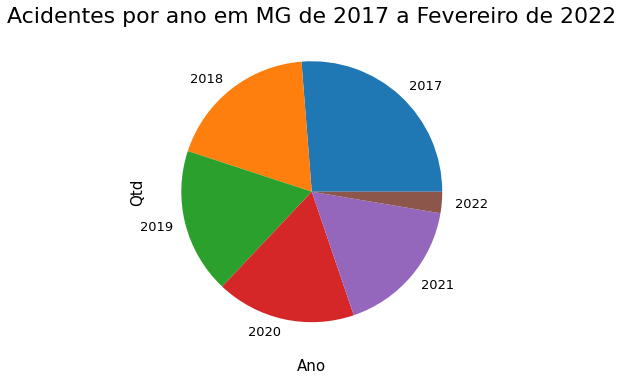

In [ ]:
ax = Acidentes_por_ano.plot(kind='pie', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Qtd", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.show()

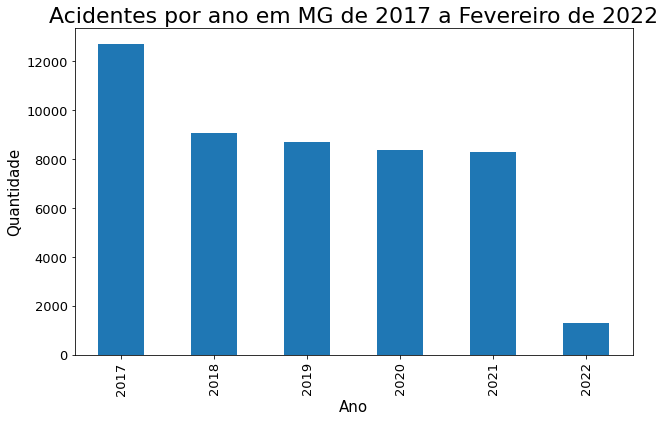

In [ ]:
ax = Acidentes_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.show()

In [ ]:
Total_de_feridos = datatran_mg['feridos'].sum()
print("Feridos em acidentes em MG de 2017 a Fevereiro de 2022: " + str(Total_de_feridos))

Feridos em acidentes em MG de 2017 a Fevereiro de 2022: 57740


In [ ]:
Feridos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'feridos': 'sum'})
print("Feridos em acidentes por ano em MG de 2017 a Fevereiro de 2022: " + str(Feridos_por_ano))

Feridos em acidentes por ano em MG de 2017 a Fevereiro de 2022:       feridos
Ano          
2017    13174
2018    11108
2019    11433
2020    10430
2021     9962
2022     1633


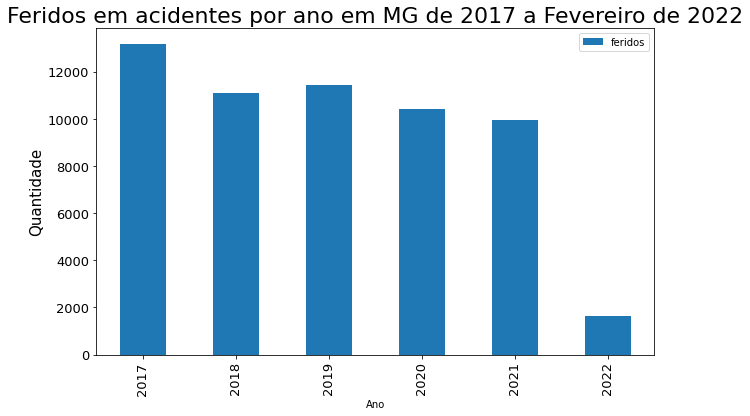

In [ ]:
ax = Feridos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Feridos em acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [ ]:
Total_de_mortos = datatran_mg['mortos'].sum()
print("Mortos em acidentes em MG de 2017 a Fevereiro de 2022: " + str(Total_de_mortos))

Mortos em acidentes em MG de 2017 a Fevereiro de 2022: 3762


In [ ]:
Mortos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'mortos': 'sum'})
print("Mortos em acidentes por ano em MG de 2017 a Fevereiro de 2022: " + str(Mortos_por_ano))

Mortos em acidentes por ano em MG de 2017 a Fevereiro de 2022:       mortos
Ano         
2017     869
2018     693
2019     678
2020     717
2021     692
2022     113


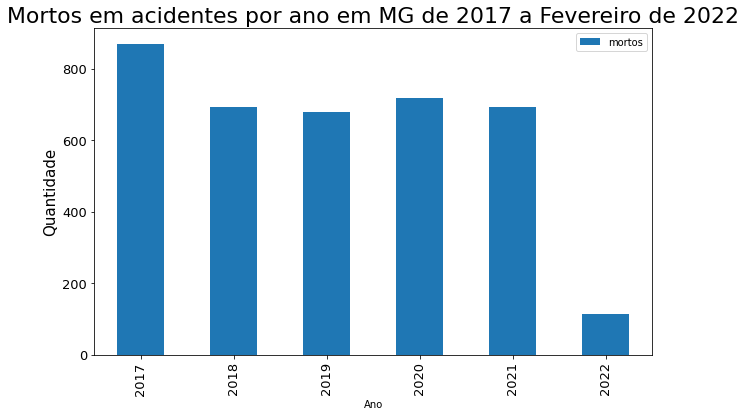

In [ ]:
ax = Mortos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Mortos em acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [ ]:
Quantidade_pessoas = datatran_mg['pessoas'].sum()
Quantidade_veiculos = datatran_mg['veiculos'].sum()
print("Envolvidos em acidentes em MG de 2017 a Fevereiro de 2022: \n Pessoas: " + str(Quantidade_pessoas) + "\n " + "Veículos envolvidos: " + str(Quantidade_veiculos))

Envolvidos em acidentes em MG de 2017 a Fevereiro de 2022: 
 Pessoas: 114046
 Veículos envolvidos: 74183


In [ ]:
Quantidade_pessoas_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'pessoas': 'sum'})
print("Pessoas envolvidas por ano em MG de 2017 a Fevereiro de 2022: " + str(Quantidade_pessoas_por_ano))
Quantidade_veiculos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'veiculos': 'sum'})
print("Veículos envolvidos por ano em MG de 2017 a Fevereiro de 2022: " + str(Quantidade_veiculos_por_ano))

Pessoas envolvidas por ano em MG de 2017 a Fevereiro de 2022:       pessoas
Ano          
2017    28820
2018    21885
2019    21380
2020    19823
2021    19016
2022     3122
Veículos envolvidos por ano em MG de 2017 a Fevereiro de 2022:       veiculos
Ano           
2017     18855
2018     13734
2019     13670
2020     13000
2021     12997
2022      1927


In [ ]:
Estado_fisico = acidentes_mg.groupby(['estado_fisico']).size().sort_values(ascending=False)
print("Estado físico dos envolvidos em MG de 2017 a Fevereiro de 2022: " + str(Estado_fisico))

Estado físico dos envolvidos em MG de 2017 a Fevereiro de 2022: estado_fisico
Ileso            46225
Lesões Leves     44886
Lesões Graves    12810
Não Informado     6229
Óbito             3762
dtype: int64


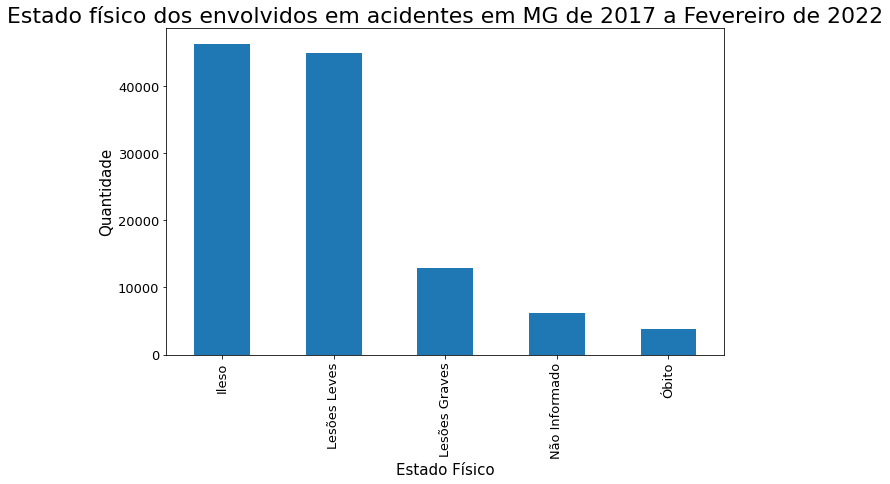

In [ ]:
ax = Estado_fisico.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Estado Físico", fontsize=15);
plt.show()

In [ ]:
Classificacao_de_acidentes = datatran_mg.groupby(['classificacao_acidente']).size().sort_values(ascending=False)
print("Classificação de acidentes em MG de 2017 a Fevereiro de 2022: " + str(Classificacao_de_acidentes))

Classificação de acidentes em MG de 2017 a Fevereiro de 2022: classificacao_acidente
Com Vítimas Feridas    35482
Sem Vítimas             9936
Com Vítimas Fatais      3063
dtype: int64


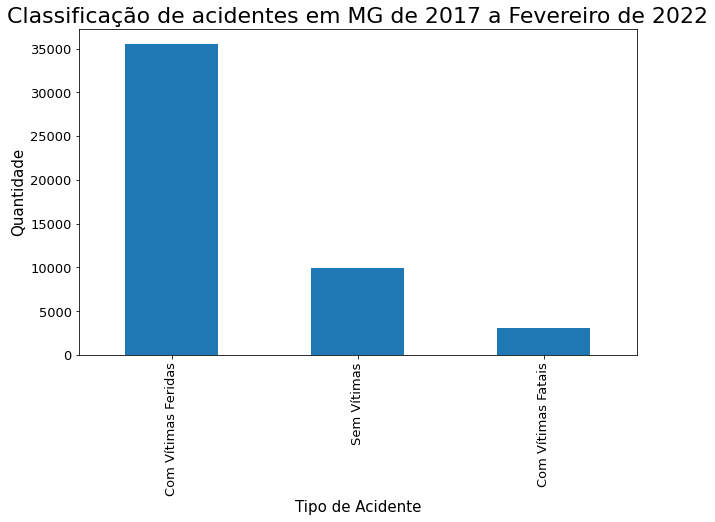

In [ ]:
ax = Classificacao_de_acidentes.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Tipo de Acidente", fontsize=15);
plt.show()

In [ ]:
Classificacao_de_acidentes_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'})
print("Classificação de acidentes por ano em MG de 2017 a Fevereiro de 2022: " + str(Classificacao_de_acidentes_por_ano))

Classificação de acidentes por ano em MG de 2017 a Fevereiro de 2022:                                id
Ano  classificacao_acidente      
2017 Com Vítimas Fatais       677
     Com Vítimas Feridas     7915
     Sem Vítimas             4138
2018 Com Vítimas Fatais       551
     Com Vítimas Feridas     6677
     Sem Vítimas             1838
2019 Com Vítimas Fatais       570
     Com Vítimas Feridas     6873
     Sem Vítimas             1277
2020 Com Vítimas Fatais       577
     Com Vítimas Feridas     6536
     Sem Vítimas             1261
2021 Com Vítimas Fatais       594
     Com Vítimas Feridas     6483
     Sem Vítimas             1231
2022 Com Vítimas Fatais        94
     Com Vítimas Feridas      998
     Sem Vítimas              191


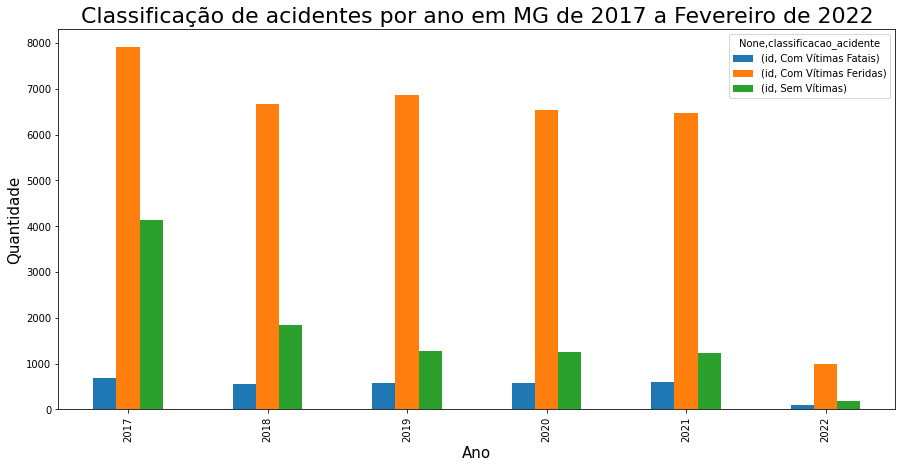

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

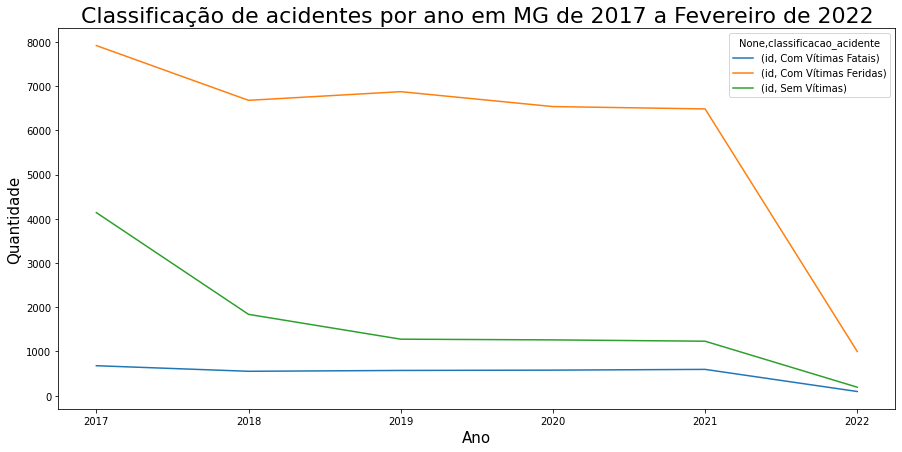

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [ ]:
Acidentes_por_dia_semana = datatran_mg.groupby(['dia_semana']).size().sort_values(ascending=False)
print("Acidentes por dia da semana em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_dia_semana))

Acidentes por dia da semana em MG de 2017 a Fevereiro de 2022: dia_semana
domingo          8329
sábado           8294
sexta-feira      7518
segunda-feira    6480
quinta-feira     6123
quarta-feira     5930
terça-feira      5807
dtype: int64


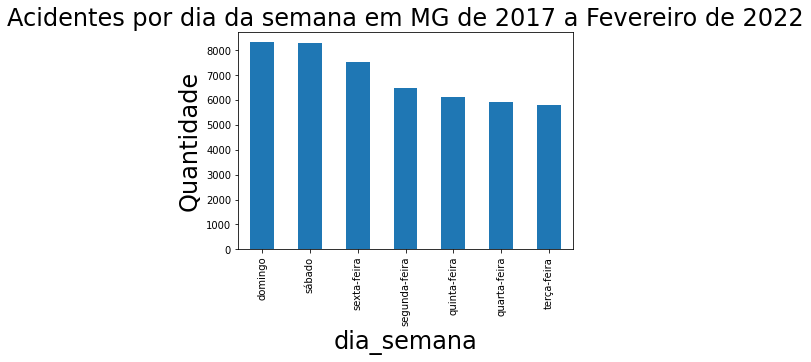

In [ ]:
plt.title('Acidentes por dia da semana em MG de 2017 a Fevereiro de 2022', fontsize=24)
plt.ylabel('Quantidade', fontsize=24)
plt.xlabel("Dia da Semana", fontsize=24)
Acidentes_por_dia_semana.plot(kind='bar')
plt.rcParams["figure.figsize"] = [12,4]
plt.show()

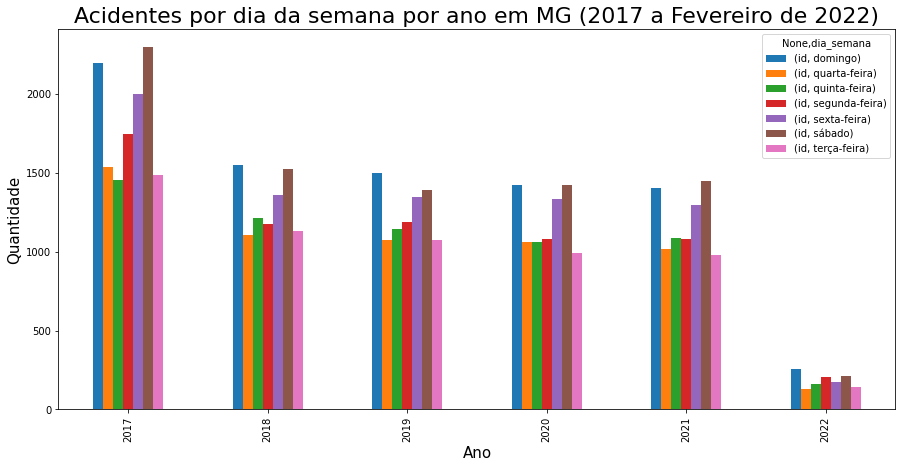

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['dia_semana']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Acidentes por dia da semana por ano em MG (2017 a Fevereiro de 2022)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [ ]:
Acidentes_por_dia_semana_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['dia_semana']]).agg({'id': 'count'})
print("Acidentes por dia da semana por ano em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_dia_semana_por_ano))

Acidentes por dia da semana por ano em MG de 2017 a Fevereiro de 2022:                       id
Ano  dia_semana         
2017 domingo        2199
     quarta-feira   1540
     quinta-feira   1453
     segunda-feira  1749
     sexta-feira    2003
     sábado         2298
     terça-feira    1488
2018 domingo        1550
     quarta-feira   1109
     quinta-feira   1216
     segunda-feira  1174
     sexta-feira    1361
     sábado         1524
     terça-feira    1132
2019 domingo        1498
     quarta-feira   1074
     quinta-feira   1145
     segunda-feira  1186
     sexta-feira    1350
     sábado         1392
     terça-feira    1075
2020 domingo        1423
     quarta-feira   1060
     quinta-feira   1060
     segunda-feira  1083
     sexta-feira    1333
     sábado         1422
     terça-feira     993
2021 domingo        1401
     quarta-feira   1016
     quinta-feira   1085
     segunda-feira  1083
     sexta-feira    1298
     sábado         1447
     terça-feira     978
2022

In [ ]:
Acidentes_por_tipo_veiculo = acidentes_mg.groupby(['tipo_veiculo']).size().sort_values(ascending=False)
print("Tipo de veículos de 2017 a Fevereiro de 2022: " + str(Acidentes_por_tipo_veiculo))

Tipo de veículos de 2017 a Fevereiro de 2022: tipo_veiculo
Automóvel            51263
Motocicleta          17221
Caminhão-trator      12368
Caminhão              9911
Caminhonete           9793
Ônibus                5879
Camioneta             2609
Micro-ônibus          1272
Bicicleta             1156
Utilitário             994
Motoneta               708
Outros                 335
Semireboque            197
Ciclomotor              77
Trator de rodas         36
Reboque                 30
Carroça-charrete        28
Triciclo                20
Não Informado            9
Trator de esteira        3
Carro de mão             2
Chassi-plataforma        1
dtype: int64


In [ ]:
Acidentes_por_tipo_veiculo = acidentes_mg.groupby(['tipo_veiculo']).size().sort_values(ascending=False).head(5)
print("Tipo de veículos de 2017 a Fevereiro de 2022: " + str(Acidentes_por_tipo_veiculo))

Tipo de veículos de 2017 a Fevereiro de 2022: tipo_veiculo
Automóvel          51263
Motocicleta        17221
Caminhão-trator    12368
Caminhão            9911
Caminhonete         9793
dtype: int64


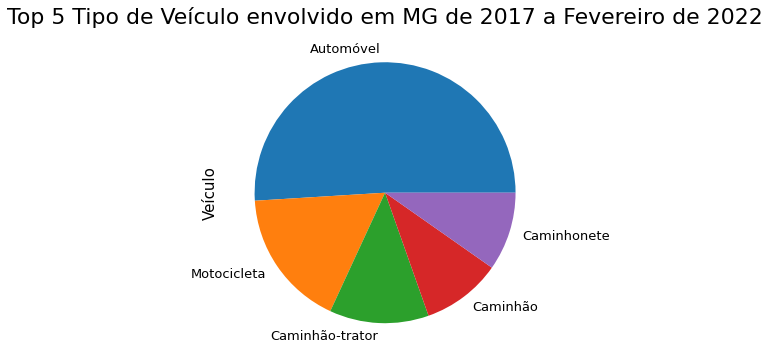

In [ ]:
ax = Acidentes_por_tipo_veiculo.plot(kind='pie', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Top 5 Tipo de Veículo envolvido em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Veículo", fontsize=15)
plt.show()

In [ ]:
Causa_de_transito_por_ano = datatran_mg.groupby(['causa_acidente']).size().sort_values(ascending=False).head(5)
print("As 5 maiores causas de acidentes de trânsito em MG de 2017 a Fevereiro de 2022: " + str(Causa_de_transito_por_ano))

As 5 maiores causas de acidentes de trânsito em MG de 2017 a Fevereiro de 2022: causa_acidente
Falta de Atenção à Condução                          12380
Velocidade Incompatível                               9877
Condutor Dormindo                                     2888
Desobediência às normas de trânsito pelo condutor     2650
Defeito Mecânico no Veículo                           2405
dtype: int64


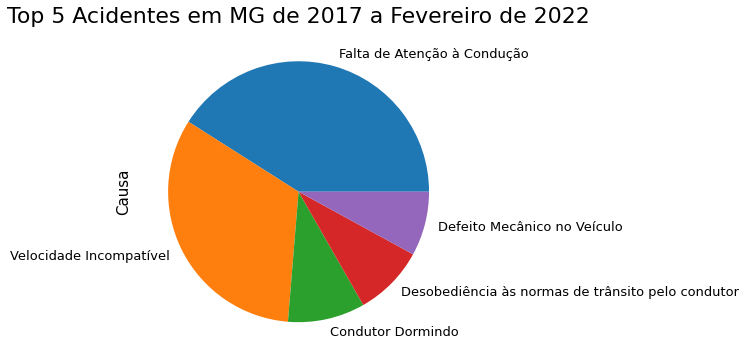

In [ ]:
ax = Causa_de_transito_por_ano.plot(kind='pie', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Top 5 Acidentes em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Causa", fontsize=15)
plt.show()

In [ ]:
causa_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['causa_acidente']]).agg({'id': 'count'})
print("Acidentes trânsito por ano em MG de 2017 a Fevereiro de 2022: " + str(causa_ano))

Acidentes trânsito por ano em MG de 2017 a Fevereiro de 2022:                                                            id
Ano  causa_acidente                                          
2017 Agressão Externa                                       1
     Animais na Pista                                     287
     Avarias e/ou desgaste excessivo no pneu              219
     Carga excessiva e/ou mal acondicionada                97
     Condutor Dormindo                                    824
     Defeito Mecânico no Veículo                          703
     Defeito na Via                                       105
     Deficiência ou não Acionamento do Sistema de Il...    25
     Desobediência às normas de trânsito pelo condutor    482
     Falta de Atenção do Pedestre                         257
     Falta de Atenção à Condução                         4102
     Fenômenos da Natureza                                 61
     Ingestão de Substâncias Psicoativas                    7
     Ing

In [ ]:
group_causa = causa_ano['id'].groupby('Ano', group_keys=False)
res_causa = group_causa.apply(lambda x: x.sort_values(ascending=False).head(5))
print("Acidentes trânsito por causa/ano em MG de 2017 a Fevereiro de 2022: " + str(res_causa))

Acidentes trânsito por causa/ano em MG de 2017 a Fevereiro de 2022: Ano   causa_acidente                                           
2017  Falta de Atenção à Condução                                  4102
      Velocidade Incompatível                                      2969
      Condutor Dormindo                                             824
      Defeito Mecânico no Veículo                                   703
      Pista Escorregadia                                            686
2018  Falta de Atenção à Condução                                  2828
      Velocidade Incompatível                                      1914
      Desobediência às normas de trânsito pelo condutor             584
      Defeito Mecânico no Veículo                                   579
      Condutor Dormindo                                             534
2019  Falta de Atenção à Condução                                  2860
      Velocidade Incompatível                                      1550
    

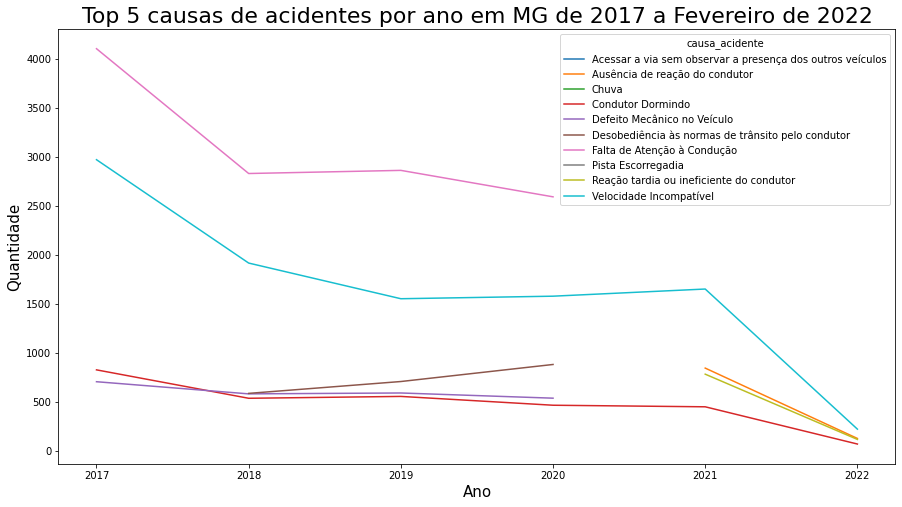

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
res_causa.unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Top 5 causas de acidentes por ano em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [ ]:
Acidentes_por_tipo = datatran_mg.groupby(['tipo_acidente']).size().sort_values(ascending=False)
print("Acidentes por tipo em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_tipo))

Acidentes por tipo em MG de 2017 a Fevereiro de 2022: tipo_acidente
Saída de leito carroçável          11036
Colisão traseira                    7405
Tombamento                          5028
Colisão transversal                 3930
Colisão lateral                     3623
Colisão com objeto estático         3431
Colisão frontal                     3177
Capotamento                         2546
Atropelamento de Pedestre           1857
Queda de ocupante de veículo        1856
Incêndio                             905
Colisão com objeto                   848
Atropelamento de Animal              753
Colisão lateral mesmo sentido        660
Engavetamento                        543
Derramamento de carga                235
Colisão lateral sentido oposto       224
Colisão com objeto em movimento      196
Danos eventuais                      177
Eventos atípicos                      51
dtype: int64


In [ ]:
datatran_mg.data_inversa = pd.to_datetime(datatran_mg.data_inversa)
Acidentes_por_mes = datatran_mg.groupby(datatran_mg['data_inversa'].dt.strftime('%B'))['id'].count().sort_values(ascending=False)
print("Acidentes por mês em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_mes))

Acidentes por mês em MG de 2017 a Fevereiro de 2022: data_inversa
January      5152
December     4608
February     4608
October      4251
July         3865
September    3862
November     3850
March        3789
August       3755
May          3620
June         3602
April        3462
Name: id, dtype: int64


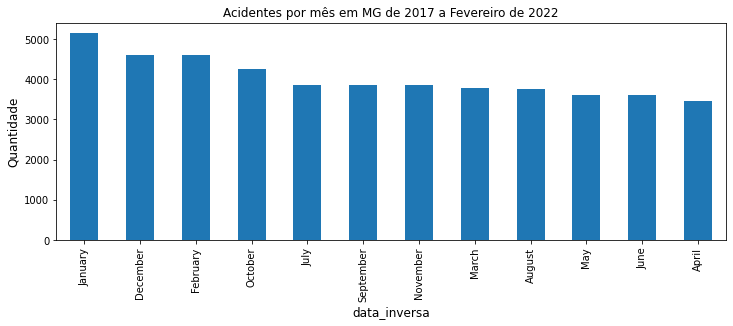

In [ ]:
plt.title('Acidentes por mês em MG de 2017 a Fevereiro de 2022', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Mês', fontsize=12)
Acidentes_por_mes.plot(kind='bar')
plt.rcParams["figure.figsize"] = [10,10]
plt.show()


In [ ]:
tipo_veiculo = acidentes_mg.groupby(['tipo_veiculo']).size().sort_values(ascending=False)
print("Tipo de veículos de 2017 a Fevereiro de 2022: " + str(tipo_veiculo))

Tipo de veículos de 2017 a Fevereiro de 2022: tipo_veiculo
Automóvel            51263
Motocicleta          17221
Caminhão-trator      12368
Caminhão              9911
Caminhonete           9793
Ônibus                5879
Camioneta             2609
Micro-ônibus          1272
Bicicleta             1156
Utilitário             994
Motoneta               708
Outros                 335
Semireboque            197
Ciclomotor              77
Trator de rodas         36
Reboque                 30
Carroça-charrete        28
Triciclo                20
Não Informado            9
Trator de esteira        3
Carro de mão             2
Chassi-plataforma        1
dtype: int64


In [ ]:
fase_do_dia = datatran_mg.groupby(['fase_dia']).size().sort_values(ascending=False)
print("Acidentes por fase do dia em MG de 2017 a Fevereiro de 2022: " + str(fase_do_dia))

Acidentes por fase do dia em MG de 2017 a Fevereiro de 2022: fase_dia
Pleno dia      27659
Plena Noite    15761
Amanhecer       2630
Anoitecer       2431
dtype: int64


In [ ]:
condi_met = datatran_mg.groupby(['condicao_metereologica']).size().sort_values(ascending=False)
print("Acidentes por condição meteorológica em MG de 2017 a Fevereiro de 2022: " + str(condi_met))

Acidentes por condição meteorológica em MG de 2017 a Fevereiro de 2022: condicao_metereologica
Céu Claro           26089
Nublado              8385
Chuva                8097
Sol                  3472
Garoa/Chuvisco       1134
Ignorado              827
Nevoeiro/Neblina      360
Vento                 113
Granizo                 3
Neve                    1
dtype: int64


In [ ]:
tipo_de_pista = datatran_mg.groupby(['tipo_pista']).size().sort_values(ascending=False)
print("Acidentes por tipo de pista em MG de 2017 a Fevereiro de 2022: " + str(tipo_de_pista))

Acidentes por tipo de pista em MG de 2017 a Fevereiro de 2022: tipo_pista
Simples     24231
Dupla       22715
Múltipla     1535
dtype: int64


In [ ]:
tracado_da_via = datatran_mg.groupby(['tracado_via']).size().sort_values(ascending=False)
print("Acidentes por tipo de traçado em MG de 2017 a Fevereiro de 2022: " + str(tracado_da_via))

Acidentes por tipo de traçado em MG de 2017 a Fevereiro de 2022: tracado_via
Reta                     23495
Curva                    13485
Não Informado             7227
Interseção de vias        1448
Desvio Temporário         1061
Rotatória                  598
Retorno Regulamentado      593
Ponte                      268
Viaduto                    244
Túnel                       62
dtype: int64


In [ ]:
sentido_via = datatran_mg.groupby(['sentido_via']).size().sort_values(ascending=False)
print("Acidentes por sentido da via em MG de 2017 a Fevereiro de 2022: " + str(sentido_via))

Acidentes por sentido da via em MG de 2017 a Fevereiro de 2022: sentido_via
Crescente        25281
Decrescente      23143
Não Informado       57
dtype: int64


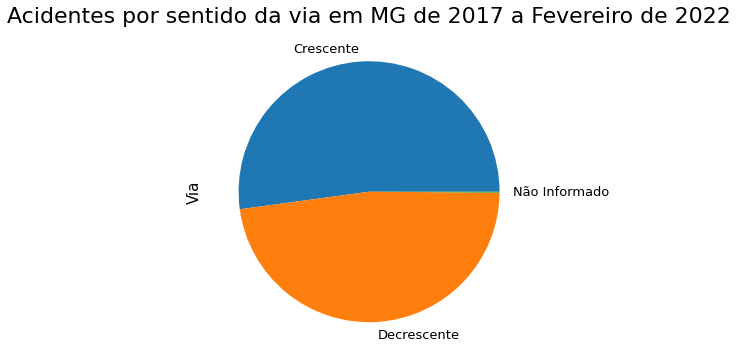

In [ ]:
ax = sentido_via.plot(kind='pie', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Acidentes por sentido da via em MG de 2017 a Fevereiro de 2022", fontsize=22)
ax.set_ylabel("Via", fontsize=15)
plt.show()

In [ ]:
uso_solo = datatran_mg.groupby(['uso_solo']).size().sort_values(ascending=False)
print("Acidentes por uso de solo em MG de 2017 a Fevereiro de 2022: " + str(uso_solo))

Acidentes por uso de solo em MG de 2017 a Fevereiro de 2022: uso_solo
Rural     34142
Urbano    14339
dtype: int64


In [ ]:
Acidentes_por_br = datatran_mg.groupby(['br']).size().sort_values(ascending=False)
print("Acidentes por BR em MG de 2017 a Fevereiro de 2022: " + str(Acidentes_por_br))

Acidentes por BR em MG de 2017 a Fevereiro de 2022: br
381    15061
40      9556
116     6209
262     5371
365     3383
50      2962
153     1316
251     1215
267      984
459      579
354      455
146      431
356      430
364      234
135      209
0         57
452       19
265        4
451        3
352        1
122        1
120        1
dtype: int64


In [ ]:
sexo_envolvido = acidentes_mg.groupby(['sexo']).size().sort_values(ascending=False)
print("Acidentes por sexo dos envolvidos em MG de 2017 a Fevereiro de 2022: " + str(sexo_envolvido))

Acidentes por sexo dos envolvidos em MG de 2017 a Fevereiro de 2022: sexo
Masculino        81665
Feminino         25434
Não Informado     6372
Ignorado           441
dtype: int64


In [ ]:
sexo_e_envolvido = acidentes_mg.groupby(['tipo_envolvido','sexo']).size()
print("Acidentes por sexo e envolvimento em MG de 2017 a Fevereiro de 2022 : " + str(sexo_e_envolvido))

Acidentes por sexo e envolvimento em MG de 2017 a Fevereiro de 2022 : tipo_envolvido  sexo         
Cavaleiro       Feminino             1
                Masculino           30
                Não Informado        2
Condutor        Feminino          6196
                Ignorado           390
                Masculino        64491
                Não Informado     2917
Passageiro      Feminino         18772
                Ignorado            48
                Masculino        15595
                Não Informado      142
Pedestre        Feminino           465
                Ignorado             3
                Masculino         1549
                Não Informado       16
Testemunha      Não Informado     3295
dtype: int64


#Interpretação
Classificação por gravidade dos acidentes baseado nas causas e seus indices de mortalidade por KM(extensão estatal)

In [ ]:
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
class_acid = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['causa_acidente'], datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).reset_index())
class_acid.rename(columns={'causa_acidente':'Causa'}, inplace=True)
class_acid.rename(columns={'br':'BR'}, inplace=True)
class_acid.rename(columns={'id':'Acidentes'}, inplace=True)
class_acid['Sem_Vitimas'] = '0'
class_acid['Com_Vitimas_Feridas'] = '0'
class_acid['Com_Vitimas_Fatais'] = '0'
class_acid['Causa'] = class_acid.Causa.astype('object')
class_acid['BR'] = class_acid.BR.astype('object')
class_acid['Sem_Vitimas'] = class_acid.Sem_Vitimas.astype('int64')
class_acid['Com_Vitimas_Feridas'] = class_acid.Com_Vitimas_Feridas.astype('int64')
class_acid['Com_Vitimas_Fatais'] = class_acid.Com_Vitimas_Fatais.astype('int64')
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Fatais', 'Com_Vitimas_Fatais'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Feridas', 'Com_Vitimas_Feridas'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Sem Vítimas', 'Sem_Vitimas'] = class_acid['Acidentes']
class_acid.drop(columns=['classificacao_acidente'], axis=1, inplace=True)
class_acid.drop(columns=['Acidentes'], axis=1, inplace=True)
class_acidentes = pd.DataFrame(class_acid.groupby([class_acid['Ano'], class_acid['Causa'], class_acid['BR']]).agg({'Sem_Vitimas' : 'sum', 'Com_Vitimas_Feridas' : 'sum', 'Com_Vitimas_Fatais' : 'sum'}).reset_index())
#class_acidentes.head(10)

# #Extensões por trecho de BR
tab_snv_2017_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2017_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2018_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2018_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2019_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2019_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2020_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2020_mg.csv', sep=';', decimal=',', encoding = 'utf_8')
tab_snv_2021_mg = pd.read_csv('/content/drive/My Drive/PUC_TCC/tab_snv_2021_mg.csv', sep=';', decimal=',', encoding = 'utf_8')

#Extensões por BR
tab_snv_2017_mg_br = pd.DataFrame(tab_snv_2017_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2018_mg_br = pd.DataFrame(tab_snv_2018_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2019_mg_br = pd.DataFrame(tab_snv_2019_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2020_mg_br = pd.DataFrame(tab_snv_2020_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2021_mg_br = pd.DataFrame(tab_snv_2020_mg.groupby('BR', as_index = False)['Extensao'].sum()).reset_index()
tab_snv_2017_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2017_mg_br['Ano'] = '2017'
tab_snv_2018_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2018_mg_br['Ano'] = '2018'
tab_snv_2019_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2019_mg_br['Ano'] = '2019'
tab_snv_2020_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2020_mg_br['Ano'] = '2020'
tab_snv_2021_mg_br.rename(columns={'index':'Ano'}, inplace=True)
tab_snv_2021_mg_br['Ano'] = '2021'

#juntando as bases
tab_snv_mg_br = pd.concat([tab_snv_2017_mg_br,tab_snv_2018_mg_br,tab_snv_2019_mg_br,tab_snv_2020_mg_br, tab_snv_2021_mg_br], join="inner")
tab_snv_mg_br.set_index('Ano', inplace = True)

#Excluindo BRs sem acidentes registrados
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[0,4,5,9,11,13,15,16,21,22,24,25,26,27,28,29,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[19,20,24,26,28,30,31,36,37,39,40,41,42,43,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[37,40,42,46,47,52,53,55,56,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.drop(tab_snv_mg_br.index[[53,54,55,58,60,64,70,71,73,74,75,76,77,78,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95]], inplace=True)
tab_snv_mg_br.set_index('Ano', inplace = True)
tab_snv_mg_br.reset_index(inplace=True)
tab_snv_mg_br.to_csv('/content/drive/My Drive/PUC_TCC/tab_snv_mg_br.csv', index=False)


#Preparação para a geração dos indicadores
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
#datatran_mg.info()
data_tab_mg = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['causa_acidente']]).agg({'id': 'count', 'feridos' : 'sum', 'mortos' : 'sum', 'pessoas' : 'sum'}).reset_index())
data_tab_mg.rename(columns={'id':'Acidentes'}, inplace=True)
data_tab_mg.rename(columns={'feridos':'Feridos'}, inplace=True)
data_tab_mg.rename(columns={'mortos':'Mortes'}, inplace=True)
data_tab_mg.rename(columns={'pessoas':'Envolvidos'}, inplace=True)
data_tab_mg.rename(columns={'br':'BR'}, inplace=True)
data_tab_mg.rename(columns={'causa_acidente':'Causa'}, inplace=True)
data_tab_mg['BR'] = data_tab_mg.BR.astype('object')
data_tab_mg['Causa'] = data_tab_mg.Causa.astype('object')
# print(data_tab_mg)
tab_snv_mg_br.drop(columns=['BR'], axis=1, inplace=True)
data_tab_mg.drop(columns=['Ano'], axis=1, inplace=True)
data_indices = pd.DataFrame(pd.concat([tab_snv_mg_br, data_tab_mg], axis=1, join="inner")).reset_index()
data_indices.drop(columns=['index'], axis=1, inplace=True)
# print(data_indices)
#data_indices.info()

#Gerando os indicadores dos dados de 2017 
data_2017 = data_indices.loc[(data_indices['Ano'] == "2017")]
# data_2017.head(50)
data_2017['%_Extensão_BR'] = (data_2017['Extensao'] / data_2017['Extensao'].sum())*100
data_2017['%_Acidente_BR'] = (data_2017['Acidentes'] / data_2017['Acidentes'].sum())*100
data_2017['%_Feridos_BR'] = (data_2017['Feridos'] / data_2017['Feridos'].sum())*100
data_2017['%_Mortes_BR'] = (data_2017['Mortes'] / data_2017['Mortes'].sum())*100
data_2017['Acidente_KM'] = (data_2017['Acidentes'] / data_2017['Extensao'])
data_2017['Mortes_KM'] = (data_2017['Mortes'] / data_2017['Extensao'])
data_2017 = data_2017.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
data_2017.drop(columns=['index'], axis=1, inplace=True)
# print(data_2017)
# data_2017.head(50)

#Gerando os indicadores dos dados de 2018
data_2018 = data_indices.loc[(data_indices['Ano'] == "2018")]
# data_2018.head(50)
data_2018['%_Extensão_BR'] = (data_2018['Extensao'] / data_2018['Extensao'].sum())*100
data_2018['%_Acidente_BR'] = (data_2018['Acidentes'] / data_2018['Acidentes'].sum())*100
data_2018['%_Feridos_BR'] = (data_2018['Feridos'] / data_2018['Feridos'].sum())*100
data_2018['%_Mortes_BR'] = (data_2018['Mortes'] / data_2018['Mortes'].sum())*100
data_2018['Acidente_KM'] = (data_2018['Acidentes'] / data_2018['Extensao'])
data_2018['Mortes_KM'] = (data_2018['Mortes'] / data_2018['Extensao'])
data_2018 = data_2018.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
data_2018.drop(columns=['index'], axis=1, inplace=True)
# print(data_2018)
#data_2018.head(10)

#Gerando os indicadores dos dados de 2019 
data_2019 = data_indices.loc[(data_indices['Ano'] == "2019")]
# data_2019.head(50)
data_2019['%_Extensão_BR'] = (data_2019['Extensao'] / data_2019['Extensao'].sum())*100
data_2019['%_Acidente_BR'] = (data_2019['Acidentes'] / data_2019['Acidentes'].sum())*100
data_2019['%_Feridos_BR'] = (data_2019['Feridos'] / data_2019['Feridos'].sum())*100
data_2019['%_Mortes_BR'] = (data_2019['Mortes'] / data_2019['Mortes'].sum())*100
data_2019['Acidente_KM'] = (data_2019['Acidentes'] / data_2019['Extensao'])
data_2019['Mortes_KM'] = (data_2019['Mortes'] / data_2019['Extensao'])
data_2019 = data_2019.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
data_2019.drop(columns=['index'], axis=1, inplace=True)
# print(data_2019)
# data_2019.head(10)

#Gerando os indicadores dos dados de 2020
data_2020 = data_indices.loc[(data_indices['Ano'] == "2020")]
# data_2020.head(50)
data_2020['%_Extensão_BR'] = (data_2020['Extensao'] / data_2020['Extensao'].sum())*100
data_2020['%_Acidente_BR'] = (data_2020['Acidentes'] / data_2020['Acidentes'].sum())*100
data_2020['%_Feridos_BR'] = (data_2020['Feridos'] / data_2020['Feridos'].sum())*100
data_2020['%_Mortes_BR'] = (data_2020['Mortes'] / data_2020['Mortes'].sum())*100
data_2020['Acidente_KM'] = (data_2020['Acidentes'] / data_2020['Extensao'])
data_2020['Mortes_KM'] = (data_2020['Mortes'] / data_2020['Extensao'])
data_2020 = data_2020.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
data_2020.drop(columns=['index'], axis=1, inplace=True)
# print(data_2020)
# data_2020.head(10)

#Gerando os indicadores dos dados de 2021
data_2021 = data_indices.loc[(data_indices['Ano'] == "2021")]
# data_2021.head(50)
data_2021['%_Extensão_BR'] = (data_2021['Extensao'] / data_2021['Extensao'].sum())*100
data_2021['%_Acidente_BR'] = (data_2021['Acidentes'] / data_2021['Acidentes'].sum())*100
data_2021['%_Feridos_BR'] = (data_2021['Feridos'] / data_2021['Feridos'].sum())*100
data_2021['%_Mortes_BR'] = (data_2021['Mortes'] / data_2021['Mortes'].sum())*100
data_2021['Acidente_KM'] = (data_2021['Acidentes'] / data_2021['Extensao'])
data_2021['Mortes_KM'] = (data_2021['Mortes'] / data_2021['Extensao'])
data_2021 = data_2021.reindex(columns=['Ano', 'Causa','BR', 'Extensao', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
data_2021.drop(columns=['index'], axis=1, inplace=True)
# print(data_2021)
# data_2021.head(10)

#Consolidando os indicadores de acidentalidade em um único dataframe
indices_data = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021], sort = False).reset_index()
indices_data.drop(columns=['index'], axis=1, inplace=True)
class_acidentes.drop(columns=['Ano'], axis=1, inplace=True)
class_acidentes.drop(columns=['BR'], axis=1, inplace=True)
class_acidentes.drop(columns=['Causa'], axis=1, inplace=True)
indices_acidentes = pd.concat([indices_data, class_acidentes], axis=1, sort = False).reset_index()
indices_acidentes.drop(columns=['index'], axis=1, inplace=True)
indices_acidentes['Gravidade'] = (indices_acidentes['Sem_Vitimas'] + (5 * indices_acidentes['Com_Vitimas_Feridas'])+(13 * indices_acidentes['Com_Vitimas_Fatais'])) / indices_acidentes['Extensao']
indices_acidentes.to_csv('/content/drive/My Drive/PUC_TCC/indices_acidentes.csv', index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [ ]:
#Relação dos indicadores dos acidentes
indices_acidentes.head()

,Ano,Causa,BR,Extensao,Acidentes,Envolvidos,Feridos,Mortes,%_Extensão_BR,%_Acidente_BR,Acidente_KM,%_Feridos_BR,%_Mortes_BR,Mortes_KM,Sem_Vitimas,Com_Vitimas_Feridas,Com_Vitimas_Fatais,Gravidade
0,2017,Defeito na Via,0,893.9,1.0,1.0,0.0,0.0,8.7231,0.0711,0.0011,0.0000,0.0,0.0,0,1,0,0.0056
1,2017,Desobediência às normas de trânsito pelo condutor,0,269.8,1.0,2.0,1.0,0.0,2.6328,0.0711,0.0037,0.0672,0.0,0.0,12,32,0,0.6375
2,2017,Falta de Atenção à Condução,0,818.1,11.0,26.0,13.0,0.0,7.9834,0.7818,0.0134,0.8731,0.0,0.0,3,2,0,0.0159
3,2017,Ingestão de Álcool,0,834.7,1.0,2.0,0.0,0.0,8.1454,0.0711,0.0012,0.0000,0.0,0.0,21,51,2,0.3618
4,2017,Não guardar distância de segurança,0,726.8,1.0,2.0,1.0,0.0,7.0925,0.0711,0.0014,0.0672,0.0,0.0,1,3,0,0.0220
